# Dynamical model fitting

This notebook contains the main project code for the dynamical model fitting.


In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import numpyro
numpyro.enable_x64(True)
numpyro.set_platform("gpu")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("colorblind", 10))
from plotting import *

## Load model
from model import *
## Load data
from data import load_mira_sample
data = load_mira_sample(lowb=True, sig_clip=3., reliable=True, 
                        high_amp=True, per_cut=[100.,1000.], 
                        scale_proper_motion_errors=False)

## Selection function
from selection_function import selection_function
include_selection_function = True
if include_selection_function:
    SF = selection_function(data_file='selection_function.csv')
    mSF = selection_function(data_file='selection_function_modified.csv')
else:
    SF = None

## Bar model interpolant
from bar_model_interpolant import Portail_interp
import pickle
use_pickle = False
if include_selection_function:
    if use_pickle:
        with open('/data/jls/mira/bar_model_distance_interpolant.pkl', 'rb') as f:
            bar_model = pickle.load(f)
    else:
        bar_model = Portail_interp(N=20, include_distance=True, cut_radius=8., use_vtransverse=False)
        with open('/data/jls/mira/bar_model_distance_interpolant.pkl', 'wb') as f:
            pickle.dump(bar_model, f)
else:
    bar_model = Portail_interp(N=20, include_distance=False, cut_radius=20.)
    
bar_model_nodist = Portail_interp(N=20, include_distance=False, cut_radius=20.)

default_N_knots = 12

1782
1691 91
1415 342
1392 18
1172 282
1163 42
reading Portail bar...
finished
reading Portail bar...
finished


# Sormani+ 2022 model -- best f(J) params

In [2]:
ssA = np.array([0., -0.05576432, -0.04616002])
print(np.count_nonzero(~(np.hypot((data['l']-360.*(data['l']>180.))-ssA[1],
                          data['b']-ssA[2])>np.rad2deg(5./8275.)*1.)))
print(np.count_nonzero(~(np.hypot((data['l']-360.*(data['l']>180.))-ssA[1],
                          data['b']-ssA[2])>np.rad2deg(5./8275.)*2.)))

21
51


/home/jls/miniconda3/envs/chemevo/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/jls/miniconda3/envs/chemevo/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


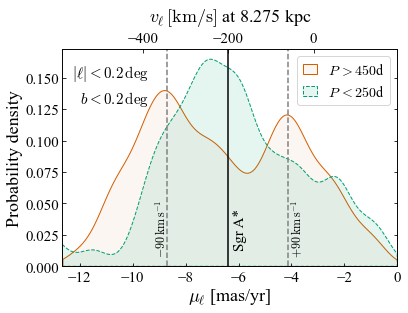

In [3]:
ssA = np.array([0., -0.05576432, -0.04616002])
not_nsc = (np.hypot((data['l']-360.*(data['l']>180.))-ssA[1],
                          data['b']-ssA[2])>np.rad2deg(4.2/8275.)*2.)


sns.kdeplot(data['pml'][(np.abs(data['l']-360.*(data['l']>180.))<0.2)
&(data['period']>450.)&(np.abs(data['b'])<0.2)#&not_nsc
&(np.abs(data['epml'])<7.)]/4.74,bw=0.2,clip=[-60/4.74,0],
color=sns.color_palette('colorblind')[3],label='$P\,>450$d',fill=True,alpha=0.05);

sns.kdeplot(data['pml'][(np.abs(data['l']-360.*(data['l']>180.))<0.2)#&not_nsc
&(data['period']<250.)&(np.abs(data['b'])<0.2)
&(np.abs(data['epml'])<7.)]/4.74,bw=0.2,clip=[-60/4.74,0],
color=sns.color_palette('colorblind')[2],label='$P\,<250$d',fill=True,alpha=0.1,ls='dashed');
plt.annotate(r'$|\ell|<0.2\,\mathrm{deg}$',xy=(-12.3,0.15),fontsize=15)
plt.annotate(r'$b<0.2\,\mathrm{deg}$',xy=(-12.,0.13),fontsize=15)
plt.axvline(-6.41,color='k')
plt.axvline(-6.41-90./8.275/4.74,color='gray',ls='--')
plt.axvline(-6.41+90./8.275/4.74,color='gray',ls='--')
plt.xlabel(r'$\mu_\ell$ [mas/yr]')
plt.xlim(-60./4.74,0.)
plt.ylabel('Probability density')
plt.annotate('Sgr A*', (-6.2,0.015),rotation=90,fontsize=15)

plt.gca().tick_params(axis="y",direction="in")
plt.gca().tick_params(axis="x",direction="in")
plt.gca().tick_params(axis="y",direction="in",which='minor')
plt.gca().tick_params(axis="x",direction="in",which='minor')
plt.gca().tick_params(axis='y', which='minor', bottom=False)
plt.gca().yaxis.set_ticks_position('both')
l=plt.legend(loc='upper right',handlelength=1)
# for text in l.get_texts():
#     text.set_color("red")
plt.gca().twiny()
plt.xlim(-15*4.74*8.275,5*4.74*8.275)
plt.xlabel(r'$v_\ell\,[\mathrm{km}/\mathrm{s}]$ at 8.275 kpc', labelpad=10)
plt.annotate(r'$-90\,\mathrm{km\,s}^{-1}$',xy=(-105-6.41*4.74*8.275,0.01),fontsize=12,ha='center',rotation=90)
plt.annotate(r'$+90\,\mathrm{km\,s}^{-1}$',xy=(215-6.41*4.74*8.275,0.01),fontsize=12,ha='center',rotation=90)

plt.gca().tick_params(axis="x",direction="in")
plt.gca().tick_params(axis="x",direction="in",which='minor')

plt.savefig('plots/kinematics_split.pdf',bbox_inches='tight')

In [4]:
from jax.scipy.special import logsumexp

def logL_gmix(data, params):
    '''log-likelihood for a gaussian mixture model'''
    spl_cov = jnp.exp(2.*params['ln_std']) + data['pm_cov'][:,np.newaxis]

    return logsumexp(
        jnp.log(params['mix'])
        -.5*(data['pm'][:,np.newaxis]-params['mean'])**2/spl_cov
        -.5*jnp.log(2*jnp.pi*spl_cov),
        axis=-1
    )

def run_multi_fit(data_in, compt='l',K=2,num_warmup=100, num_samples=300,shift=0.):
    """
    Run a gaussian mixture model fit to the proper motion data

    Parameters
    ----------
    compt : str
        'l' or 'b' for l or b proper motion
    K : int
        number of components in the mixture model
    num_warmup : int
        number of warmup steps
    num_samples : int
        number of samples
    shift : float
        shift the proper motion by this amount

    Returns
    -------
    dict
        dictionary containing the model and the input data
    """
    input_data = {'pm':data_in-shift,
                  'pm_cov':np.zeros_like(data_in)}

    parameters = {'mean':numpyro.distributions.TransformedDistribution(
                        numpyro.distributions.Normal(0., 1.).expand([K])
                        ,numpyro.distributions.transforms.OrderedTransform()),
                  'ln_std':numpyro.distributions.Normal(1., 2.).expand([K]), 
                  'mix':numpyro.distributions.Dirichlet(0.5 * np.ones(K))}

    model = numpyro_model(logL_gmix, parameters, input_data)
    model.run_mcmc(num_warmup=num_warmup, num_samples=num_samples)

    return {'model':model, 'data':input_data, 'shift':shift}

Using S22 weights
[5.07879839e-02 1.87795214e-02 1.11941525e+02 3.30594378e-01]


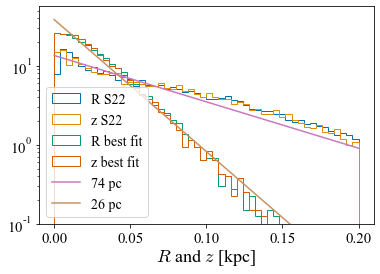

In [5]:
## Run optimization on S22 samples
## ===============================
from df_jax import binney_df_jax_spline, quasiisothermal_df_jax_spline

default_model_coords = make_default_galaxy_model().sample(10000)[0]
default_model_action = default_action_finder(default_model_coords)
default_model_action = jnp.vstack([default_model_action.T, 
                                  find_frequencies(default_model_action, default_galaxy_model.potential).T]).T

aux_params = {'use_s22_weights':True, 'include_background_weight':False, 'df_type':'quasiisothermal'}

from jax.scipy.optimize import minimize
def minimize_logL_bdf(params, aux_params):
    bdf = quasiisothermal_df_jax_spline(params[0],
                               params[1],
                               params[2],
                               params[3],
                               aux_knots=None, 
                               )
    return -jnp.sum(bdf(default_model_action,jnp.ones_like(len(default_model_action))*2.5,log=True))

class simple_min(object):
    def __init__(self,m,ax):
        self.x = m.x
        self.aux_parameters = ax
        self.type='s22'

min_results_s22 = simple_min(minimize(minimize_logL_bdf, 
                       jnp.array([np.log(0.07), np.log(0.03), np.log(50.), np.log(1.)]), 
                       args=(aux_params,),method='BFGS'),aux_params)

samples_map_all_s22=generate_samples(min_results_s22,
                                     Nsamples=10000,
                                     N_emcee_iterations=300)

plt.hist(np.sqrt(default_model_coords[:,0]**2+default_model_coords[:,1]**2),
         bins=50,histtype='step',range=[0,0.2],
         density=True,weights=1./np.sqrt(default_model_coords[:,0]**2+default_model_coords[:,1]**2),
         label='R S22');

AGG = agama_GalactocentricFromGalactic(samples_map_all_s22)
plt.hist(np.sqrt(AGG[:,0]**2+AGG[:,1]**2),
            bins=50,histtype='step',range=[0,0.2],
            density=True,weights=1./np.sqrt(AGG[:,0]**2+AGG[:,1]**2),label='z S22');

plt.hist(np.abs(default_model_coords[:,2]),
         bins=50,histtype='step',range=[0,0.2],
         density=True,label='R best fit');
plt.hist(np.abs(AGG[:,2]),
            bins=50,histtype='step',range=[0,0.2],
            density=True,label='z best fit');


plt.semilogy()
xx = np.linspace(0,0.2,100)
plt.plot(xx, np.exp(-xx/0.074)/0.074,label='74 pc')
plt.plot(xx, np.exp(-xx/0.026)/0.026, label='26 pc')
plt.ylim(0.1,)
plt.xlabel(r'$R$ and $z$ [kpc]')
plt.legend()

print(np.exp(min_results_s22.x))

sample: 100%|██████████████████████████████████████████████| 600/600 [00:10<00:00, 58.52it/s]


Text(0.5, 1.0, '0.3326')

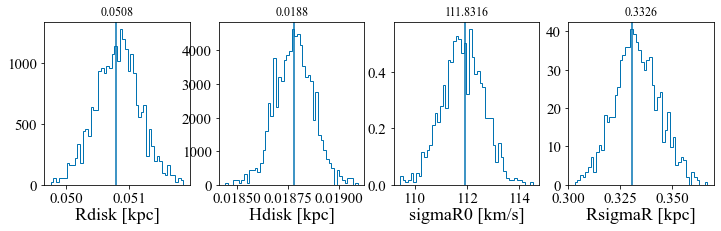

In [6]:
## Check for degeneracies in S22 parameters
def mcmc_logL_bdf(data, params):
    bdf = quasiisothermal_df_jax_spline(params['ln_Rdisk'],
                               params['ln_Hdisk'],
                               params['ln_sigmaR0'],
                               params['ln_RsigmaR'],
                               aux_knots=None, 
                               )
    return bdf(data['action'],jnp.ones_like(len(data['action']))*2.5,log=True)

parameters = {'ln_Rdisk':  numpyro.distributions.Normal(loc=jnp.log(0.07),scale=1.), 
                    'ln_Hdisk':  numpyro.distributions.Normal(loc=jnp.log(0.03),scale=1.),
                    'ln_sigmaR0': numpyro.distributions.Normal(loc=jnp.log(100.),scale=1.),
                    'ln_RsigmaR': numpyro.distributions.Normal(loc=3.,scale=1.),
                    }
model = numpyro_model(mcmc_logL_bdf, parameters, {'action':default_model_action})
model.run_mcmc(num_warmup=300, num_samples=300, num_chains=4)

f,a=plt.subplots(1,4,figsize=(12,3))
plt.sca(a[0])
plt.hist(np.exp(np.array(model.samples()['ln_Rdisk'])), bins=50, histtype='step', density=True, label='Rdisk');
plt.title('%0.4f'%np.nanmedian(np.exp(np.array(model.samples()['ln_Rdisk']))))
plt.axvline(np.exp(min_results_s22.x[0]))
plt.xlabel('Rdisk [kpc]')
plt.sca(a[1])
plt.hist(np.exp(np.array(model.samples()['ln_Hdisk'])), bins=50, histtype='step', density=True, label='Hdisk');
plt.axvline(np.exp(min_results_s22.x[1]))
plt.title('%0.4f'%np.nanmedian(np.exp(np.array(model.samples()['ln_Hdisk']))))
plt.xlabel('Hdisk [kpc]')
plt.sca(a[2])
plt.hist(np.exp(np.array(model.samples()['ln_sigmaR0'])), bins=50, histtype='step', density=True, label='sigmaR0');
plt.axvline(np.exp(min_results_s22.x[2]))
plt.title('%0.4f'%np.nanmedian(np.exp(np.array(model.samples()['ln_sigmaR0']))))
plt.xlabel('sigmaR0 [km/s]')
plt.sca(a[3])
plt.hist(np.exp(np.array(model.samples()['ln_RsigmaR'])), bins=50, histtype='step', density=True, label='RsigmaR');
plt.axvline(np.exp(min_results_s22.x[3]))
plt.xlabel('RsigmaR [kpc]')
plt.title('%0.4f'%np.nanmedian(np.exp(np.array(model.samples()['ln_RsigmaR']))))

# Generating numerator and denominator samples 

In [7]:
n_d_samples_noSF = generate_numerator_and_denominator_samples(data, bar_model_nodist, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=None,
                                                         include_radial_velocities=False,
                                                         include_pml=True)

In [8]:
n_d_samples = generate_numerator_and_denominator_samples(data, bar_model, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=SF,
                                                         include_radial_velocities=False,
                                                         include_pml=True)

In [9]:
n_d_samples_modified = generate_numerator_and_denominator_samples(data, bar_model, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=mSF,
                                                         include_radial_velocities=False,
                                                         include_pml=True)

In [10]:
## Optimization function
## =====================

from typing import Any
from jax.scipy.optimize import minimize

def knots(Nknots, knot_spacing):

    if knot_spacing=='linear':
        spacing = 1./(Nknots-3)
        return jnp.linspace(2.-spacing,3.+spacing,Nknots)
    elif knot_spacing=='percentile':
        return jnp.percentile(data['period'].values, jnp.linspace(0.,100.,Nknots+2))[1:-1]
    elif knot_spacing=='age':
        return np.log10(period_age(jnp.linspace(0.2,12.,Nknots)))

class minimization_results:
    def __init__(self, m, aux):
        self.x = m.x
        self.min=m
        self.aux_parameters = aux
        self.type='minimization'


def run_optimization_no_spline(n_d_samples, min_period, max_period, include_background_weight, 
                               use_s22_weights, background_model='p17', df_type='quasiisothermal'):
    """
    Run optimization for a given period range, with or without the Portail weight, and with or without the S22 weights.
    Not using spline for the DF.

    Parameters
    ----------
    n_d_samples : dict
        Dictionary of numerator and denominator samples.
    min_period : float
        Minimum period to include in the optimization.
    max_period : float
        Maximum period to include in the optimization.
    include_background_weight : bool
        Whether to include the background weight in the optimization.
    background_model : str
        Which background model to use. Either 'p17' or 'dd' for Portail+17 and data-driven respectively.
    use_s22_weights : bool
        Whether to use the S22 weights in the optimization.
    df_type : str
        Type of DF to use. Either 'quasiisothermal' or 'binney'.

    Returns
    -------
    min_results : dict
        Dictionary of the results of the optimization.
    """

    aux_params = {'include_background_weight':include_background_weight, 
                  'df_type': df_type, 
                  'use_s22_weights': use_s22_weights,
                  'background_model': background_model}

    fltr = (n_d_samples['denom_log10P'][:,0]>np.log10(min_period))&(n_d_samples['denom_log10P'][:,0]<np.log10(max_period))
    n_d_samples_fltr = {k: n_d_samples[k][fltr] for k in n_d_samples.keys()}

    prior_std_widths = jnp.array([0.3,0.3,0.3,0.3])

    def minimize_logL_numpyro(params, aux_params):

        params_S = {'ln_Rdisk':params[0],
                    'ln_Hdisk':params[1],
                    'ln_sigmaR0':params[2],
                    'ln_RsigmaR':params[3]}
        
        if aux_params['include_background_weight']:
            if aux_params['use_s22_weights']:
                params_S = {'ln_w_P': params[0]}
            else:
                params_S['ln_w_P'] = params[4]

        if not aux_params['use_s22_weights']:
            prior = jnp.sum(-(params[:4]-min_results_s22.x[:4])**2/2./prior_std_widths**2)
        else:
            prior = 0.
        
        return -jnp.sum(logL_numpyro(n_d_samples_fltr, params_S, 
                                     use_s22_weights=aux_params['use_s22_weights'], 
                                     df_type=aux_params['df_type'],
                                     include_background_weight=aux_params['include_background_weight'],
                                     aux_knots=None,
                                     background_model=aux_params['background_model']))-prior

    def init_guess(aux_params):
        if aux_params['include_background_weight']:
            if aux_params['use_s22_weights']:
                return jnp.zeros(1)
            else:
                return jnp.concatenate([jnp.array(min_results_s22.x),jnp.zeros(1)])
        else:
            return jnp.array(min_results_s22.x)

    min_results = minimize(minimize_logL_numpyro, init_guess(aux_params), 
                        args=(aux_params,),method='BFGS')
    
    return minimization_results(min_results, aux_params)

def run_optimization_spline(n_d_samples, 
                            Nknots,
                            include_background_weight, 
                            use_s22_weights,
                            background_model='p17', 
                            knot_spacing='linear', 
                            df_type='quasiisothermal'):
    """
    Run optimization for a given period range, with or without the Portail weight, and with or without the S22 weights.
    Not using spline for the DF.

    Parameters
    ----------
    n_d_samples : dict
        Dictionary of numerator and denominator samples.
    min_period : float
        Minimum period to include in the optimization.
    max_period : float
        Maximum period to include in the optimization.
    include_background_weight : bool
        Whether to include the background weight in the optimization.
    background_model : str
        Which background model to use. Either 'p17' or 'dd' for Portail+17 and data-driven respectively.
    use_s22_weights : bool
        Whether to use the S22 weights in the optimization.
    df_type : str
        Type of DF to use. Either 'quasiisothermal' or 'binney'.

    Returns
    -------
    min_results : dict
        Dictionary of the results of the optimization.
    """

    aux_params = {'include_background_weight':include_background_weight, 
                  'df_type': df_type, 
                  'use_s22_weights': use_s22_weights,
                  'background_model': background_model}
                  
    aux_params['aux_knots'] = knots(Nknots, knot_spacing)

    prior_std_widths = jnp.array([0.3,0.3,0.3,0.3])

    def minimize_logL_numpyro(params, aux_params):

        params_S = {'ln_Rdisk':params[:Nknots],
                    'ln_Hdisk':params[Nknots:2*Nknots],
                    'ln_sigmaR0':params[2*Nknots:3*Nknots],
                    'ln_RsigmaR':params[3*Nknots:4*Nknots]}

        if aux_params['include_background_weight']:
            if aux_params['use_s22_weights']:
                params_S = {'ln_w_P': params[:Nknots]}
            else:
                params_S['ln_w_P'] = params[4*Nknots:5*Nknots]

        prior = -jnp.sum((params.reshape(aux_params['Nparams'], Nknots)-aux_params['prior_mean'][:,np.newaxis])**2/2./aux_params['prior_std'][:,np.newaxis]**2)

        return -jnp.sum(logL_numpyro(n_d_samples, params_S, 
                                     use_s22_weights=aux_params['use_s22_weights'], 
                                     df_type=aux_params['df_type'],
                                     include_background_weight=aux_params['include_background_weight'],
                                     aux_knots=aux_params['aux_knots'],
                                     background_model=aux_params['background_model']))-prior

    def init_guess(aux_params):
        if aux_params['include_background_weight']:
            if aux_params['use_s22_weights']:
                return jnp.zeros(Nknots)
            else:
                return jnp.repeat(jnp.concatenate([jnp.array(min_results_s22.x), jnp.zeros(1)]), Nknots)
        else:
            return jnp.repeat(jnp.array(min_results_s22.x), Nknots)

    if aux_params['include_background_weight']:
        if aux_params['use_s22_weights']:
            aux_params['Nparams']=1
            aux_params['prior_mean'] = jnp.zeros(1)
            aux_params['prior_std'] = jnp.ones(1)
        else:
            aux_params['Nparams'] = 5
            aux_params['prior_mean'] = jnp.concatenate([jnp.array(min_results_s22.x), jnp.zeros(1)])
            aux_params['prior_std'] = jnp.array([0.3,0.3,0.3,0.3,1.])
    else:
        aux_params['Nparams'] = 4
        aux_params['prior_mean'] = min_results_s22.x
        aux_params['prior_std'] = jnp.array([0.3,0.3,0.3,0.3])

    min_results = minimize(minimize_logL_numpyro, 
                           init_guess(aux_params), 
                           args=(aux_params,),
                           method='BFGS')
    
    return minimization_results(min_results, aux_params)

In [11]:
## MCMC function
## =============

from jax.nn import log_sigmoid

smoothing_scale = {'ln_Rdisk':0.3, 'ln_Hdisk':0.3, 'ln_sigmaR0':0.3, 'ln_RsigmaR':0.3, 'ln_w_P':2.}

@jax.jit
def smoothing_prior(params):
    lnP=0.
    if 'ln_w_P_smooth' in params:
        if 'ln_Rdisk_smooth' in params:
            for i in smoothing_scale.keys():
                lnP += -jnp.sum(.5*(params[i][1:]-params[i][:-1])**2/(params[i+'_smooth'])**2 + jnp.log(params[i+'_smooth']))
        else:
            lnP += -jnp.sum(.5*(params['ln_w_P'][1:]-params['ln_w_P'][:-1])**2/(params['ln_w_P_smooth'])**2 + jnp.log(params['ln_w_P_smooth']))
    else:
        for i in params:
            lnP += -.5*jnp.sum((params[i][1:]-params[i][:-1])**2)/(smoothing_scale[i])**2
    return lnP

@jax.jit
def truncation_prior(params):
    # prior on truncation parameters
    # ensures that the parameters do not fall below certain values: (sigmaR0, Rdisk, Hdisk, w_P) = (50, 0.005, 0.005, 1e-6)
    if 'ln_sigmaR0' in params:
        return jnp.sum(log_sigmoid((params['ln_sigmaR0']-jnp.log(50.))/0.0005))\
        +jnp.sum(log_sigmoid((params['ln_RsigmaR']-jnp.log(0.05))/0.0005))\
        +jnp.sum(log_sigmoid((params['ln_Rdisk']-jnp.log(0.005))/0.0005))\
        +jnp.sum(log_sigmoid((params['ln_Hdisk']-jnp.log(0.005))/0.0005))\
        +jnp.sum(log_sigmoid((params['ln_w_P']-jnp.log(1e-6))/0.0005))
    else:
        return jnp.sum(log_sigmoid((params['ln_w_P']-jnp.log(1e-6))/0.0005))

def run_mcmc_no_spline(n_d_samples, min_period, max_period, include_background_weight, use_s22_weights, 
                       background_model='p17',
                       df_type='quasiisothermal', 
                       n_samples=600, 
                       prior_mean=min_results_s22.x,
                       init_with_optimization=True,
                       use_truncation_prior=True,
                       prior_scales = {'ln_Rdisk':0.6, 'ln_Hdisk':0.6, 'ln_sigmaR0':0.3, 'ln_RsigmaR':0.3, 'ln_w_P':3.},
                       chain_method="vectorized",
                       num_chains=4):
    
    aux_params = {'include_background_weight':include_background_weight, 
                  'background_model': background_model,
                  'df_type': df_type, 
                  'use_s22_weights': use_s22_weights}

    fltr = (n_d_samples['denom_log10P'][:,0]>np.log10(min_period))&(n_d_samples['denom_log10P'][:,0]<np.log10(max_period))
    n_d_samples_fltr = {k:n_d_samples[k][fltr] for k in n_d_samples.keys()}


    if aux_params['include_background_weight'] and aux_params['use_s22_weights']:
        parameters = {'ln_w_P': numpyro.distributions.Normal(0.,scale=prior_scales['ln_w_P'])}
    elif aux_params['include_background_weight'] and not aux_params['use_s22_weights']:
        parameters = {'ln_Rdisk':  numpyro.distributions.Normal(loc=prior_mean[0],scale=prior_scales['ln_Rdisk']), 
                    'ln_Hdisk':  numpyro.distributions.Normal(loc=prior_mean[1],scale=prior_scales['ln_Hdisk']),
                    'ln_sigmaR0': numpyro.distributions.Normal(loc=prior_mean[2],scale=prior_scales['ln_sigmaR0']),
                    'ln_RsigmaR': numpyro.distributions.Normal(loc=prior_mean[3],scale=prior_scales['ln_RsigmaR']),
                    'ln_w_P': numpyro.distributions.Normal(0.,scale=prior_scales['ln_w_P']),
                    }
    elif not aux_params['include_background_weight']:
        parameters = {'ln_Rdisk':  numpyro.distributions.Normal(loc=prior_mean[0],scale=prior_scales['ln_Rdisk']), 
                    'ln_Hdisk':  numpyro.distributions.Normal(loc=prior_mean[1],scale=prior_scales['ln_Hdisk']),
                    'ln_sigmaR0': numpyro.distributions.Normal(loc=prior_mean[2],scale=prior_scales['ln_sigmaR0']),
                    'ln_RsigmaR': numpyro.distributions.Normal(loc=prior_mean[3],scale=prior_scales['ln_RsigmaR'])
                    }

    if init_with_optimization:
        init_guess = run_optimization_no_spline(n_d_samples, min_period, max_period, 
                                                include_background_weight, use_s22_weights,
                                                background_model=background_model, df_type=df_type).x

        if include_background_weight and use_s22_weights:
            init_guess = {'ln_w_P':init_guess[0]}

        elif include_background_weight and not use_s22_weights:
            init_guess = {'ln_Rdisk':init_guess[0], 
                          'ln_Hdisk':init_guess[1], 
                          'ln_sigmaR0':init_guess[2], 
                          'ln_RsigmaR':init_guess[3], 
                           'ln_w_P':init_guess[4]}
                           
        elif not include_background_weight:
            init_guess = {'ln_Rdisk':init_guess[0], 
                          'ln_Hdisk':init_guess[1], 
                          'ln_sigmaR0':init_guess[2], 
                          'ln_RsigmaR':init_guess[3]}

        init_strategy=numpyro.infer.initialization.init_to_value(values=init_guess)
        
    else:
        init_strategy=numpyro.infer.init_to_sample()

    if use_truncation_prior:
        log_prior_fn = truncation_prior
    else:
        log_prior_fn = None


    model = numpyro_model(logL_numpyro, parameters, n_d_samples_fltr, aux_params, 
                          log_prior_fn=log_prior_fn)
    model.run_mcmc(num_warmup=n_samples, num_samples=n_samples, num_chains=num_chains, 
                   init_strategy=init_strategy, chain_method=chain_method)
    return model, [min_period, max_period]


def run_mcmc_spline(n_d_samples, include_background_weight, use_s22_weights, background_model='p17',
                    knot_spacing='linear', Nknots=4, df_type='quasiisothermal', n_samples=600,
                    prior_mean=min_results_s22.x,
                    init_with_optimization=True,
                    use_smoothing_prior=True,
                    use_truncation_prior=True,
                    smoothing_hyperparameter=True,
                    max_tree_depth=10,
                    prior_scales = {'ln_Rdisk':0.3, 'ln_Hdisk':0.3, 'ln_sigmaR0':0.3, 'ln_RsigmaR':0.3, 'ln_w_P':3.},
                    scaling_choice = 2.,
                    num_chains=1):
    
    aux_params = {'include_background_weight':include_background_weight, 
                  'background_model': background_model,
                  'df_type': df_type, 
                  'use_s22_weights': use_s22_weights}

    aux_params['aux_knots'] = knots(Nknots, knot_spacing)

    prior_width = 1. 
    if use_smoothing_prior:
        prior_width = scaling_choice*np.ones(Nknots)
        prior_width[Nknots//2]=1.
        prior_width = jnp.array(prior_width)

    if aux_params['include_background_weight'] and aux_params['use_s22_weights']:
        parameters = {'ln_w_P': numpyro.distributions.Normal(loc=jnp.zeros(Nknots),scale=prior_width*prior_scales['ln_w_P']).expand([Nknots])}
        if smoothing_hyperparameter:
            parameters['ln_w_P_smooth'] = numpyro.distributions.HalfNormal(scale=1.)

    elif aux_params['include_background_weight'] and not aux_params['use_s22_weights']:
        parameters = {'ln_Rdisk':  numpyro.distributions.Normal(loc=prior_mean[0]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_Rdisk']), 
                    'ln_Hdisk':  numpyro.distributions.Normal(loc=prior_mean[1]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_Hdisk']), 
                    'ln_sigmaR0': numpyro.distributions.Normal(loc=prior_mean[2]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_sigmaR0']), 
                    'ln_RsigmaR': numpyro.distributions.Normal(loc=prior_mean[3]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_RsigmaR']), 
                    'ln_w_P': numpyro.distributions.Normal(loc=jnp.zeros(Nknots),scale=prior_width*prior_scales['ln_w_P']),
                    }
        if smoothing_hyperparameter:
            parameters.update({'ln_w_P_smooth': numpyro.distributions.HalfNormal(scale=1.),
                               'ln_Rdisk_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_Hdisk_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_sigmaR0_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_RsigmaR_smooth': numpyro.distributions.HalfNormal(scale=0.3)})

    elif not aux_params['include_background_weight']:
        parameters = {'ln_Rdisk':  numpyro.distributions.Normal(loc=prior_mean[0]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_Rdisk']), 
                    'ln_Hdisk':  numpyro.distributions.Normal(loc=prior_mean[1]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_Hdisk']), 
                    'ln_sigmaR0': numpyro.distributions.Normal(loc=prior_mean[2]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_sigmaR0']), 
                    'ln_RsigmaR': numpyro.distributions.Normal(loc=prior_mean[3]*jnp.ones(Nknots), scale=prior_width*prior_scales['ln_RsigmaR'])}
        if smoothing_hyperparameter:
            parameters.update({'ln_Rdisk_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_Hdisk_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_sigmaR0_smooth': numpyro.distributions.HalfNormal(scale=0.3),
                               'ln_RsigmaR_smooth': numpyro.distributions.HalfNormal(scale=0.3)})
                    
    if init_with_optimization:

        init_guess = jnp.array(run_optimization_spline(n_d_samples, Nknots, include_background_weight, use_s22_weights,
                                                        background_model=background_model, 
                                                        knot_spacing=knot_spacing, df_type=df_type).x)

        if include_background_weight and use_s22_weights:
            init_guess = {'ln_w_P':init_guess}

        elif include_background_weight and not use_s22_weights:
            init_guess = {'ln_Rdisk':init_guess[:Nknots], 
                          'ln_Hdisk':init_guess[Nknots:2*Nknots], 
                          'ln_sigmaR0':init_guess[2*Nknots:3*Nknots], 
                          'ln_RsigmaR':init_guess[3*Nknots:4*Nknots], 
                           'ln_w_P':init_guess[4*Nknots:]}
                           
        elif not include_background_weight:
            init_guess = {'ln_Rdisk':init_guess[:Nknots], 
                          'ln_Hdisk':init_guess[Nknots:2*Nknots], 
                          'ln_sigmaR0':init_guess[2*Nknots:3*Nknots], 
                          'ln_RsigmaR':init_guess[3*Nknots:4*Nknots]}
    
        init_strategy=numpyro.infer.initialization.init_to_value(values=init_guess)
    
    else:
        init_strategy=numpyro.infer.init_to_sample()

    if use_smoothing_prior and use_truncation_prior:
        log_prior_fn = [smoothing_prior, truncation_prior]
    elif use_smoothing_prior and not use_truncation_prior:
        log_prior_fn = smoothing_prior
    elif not use_smoothing_prior and use_truncation_prior:
        log_prior_fn = truncation_prior
    else:
        log_prior_fn = None

    model = numpyro_model(logL_numpyro, parameters, n_d_samples, aux_params, 
                          log_prior_fn=log_prior_fn)
    model.run_mcmc(num_warmup=n_samples//2, num_samples=n_samples, num_chains=num_chains, 
                   init_strategy=init_strategy, max_tree_depth=max_tree_depth, 
                   chain_method="sequential")
    return model

In [12]:
## Prior choice widths
MC_TEST = numpyro_model(lambda x, y: 0., {'ln_w_P': numpyro.distributions.Normal(0., 0.3).expand([12]), 'ln_w_P_smooth': numpyro.distributions.HalfNormal(0.3)}, n_d_samples, log_prior_fn = smoothing_prior)
MC_TEST.run_mcmc(num_samples = 1000, num_warmup = 1000)
MC_TEST2 = numpyro_model(lambda x, y: 0., {'ln_w_P': numpyro.distributions.Normal(0., 0.6).expand([12]), 'ln_w_P_smooth': numpyro.distributions.HalfNormal(0.3)}, n_d_samples, log_prior_fn = smoothing_prior)
MC_TEST2.run_mcmc(num_samples = 1000, num_warmup = 1000)
MC_TEST3 = numpyro_model(lambda x, y: 0., {'ln_w_P': numpyro.distributions.Normal(0., 3.).expand([12]), 'ln_w_P_smooth': numpyro.distributions.HalfNormal(1.)}, n_d_samples, log_prior_fn = smoothing_prior)
MC_TEST3.run_mcmc(num_samples = 1000, num_warmup = 1000)
width_03=np.nanmedian(np.nanstd(np.array(MC_TEST.samples()['ln_w_P']),axis=0))
width_06=np.nanmedian(np.nanstd(np.array(MC_TEST2.samples()['ln_w_P']),axis=0))
width_1=np.nanmedian(np.nanstd(np.array(MC_TEST3.samples()['ln_w_P']),axis=0))

sample: 100%|█| 2000/2000 [00:13<00:00, 147.98it/s, 31 steps of size 1.68e-01. acc. prob=0.83
sample: 100%|█| 2000/2000 [00:13<00:00, 150.30it/s, 31 steps of size 1.06e-01. acc. prob=0.67
sample: 100%|█| 2000/2000 [02:40<00:00, 12.47it/s, 1023 steps of size 3.50e-03. acc. prob=1.0


## No spline -- global weight

In [13]:
# Optimization results
print('S22 weights, with Portail17', run_optimization_no_spline(n_d_samples, 100.,1000.,True,True,background_model='p17').x[0])
print('S22 weights, with Portail17 -- no selection function', run_optimization_no_spline(n_d_samples_noSF, 100.,1000.,True,True,background_model='p17').x[0])

###print('S22 weights, with Data-Driven', run_optimization_no_spline(n_d_samples, 100.,1000.,True,True,background_model='dd').x[0])
# print('S22 weights, with Portail17, no pml', run_optimization_no_spline(n_d_samples_nopml, 100.,1000.,True,True,background_model='p17').x[0])
# ###print('S22 weights, with Data-Driven, no pml', run_optimization_no_spline(n_d_samples_nopml, 100.,1000.,True,True,background_model='dd').x[0])
# print('S22 weights, with Data-Driven -- no selection function', run_optimization_no_spline(n_d_samples_noSF, 100.,1000.,True,True,background_model='dd').x[0])

S22 weights, with Portail17 0.17571774355898803
S22 weights, with Portail17 -- no selection function 0.08295005955271835


In [14]:
print('S22 weights, with Portail17 -- alternative selection function', 
      run_optimization_no_spline(n_d_samples_modified, 100.,1000.,True,True,background_model='p17').x[0])
mc_s22_ns_alt = run_mcmc_no_spline(n_d_samples_modified, 100,1000,True, True, n_samples=800, background_model='p17')


S22 weights, with Portail17 -- alternative selection function 0.23571960768489175


sample: 100%|███████████████████████████████████████████| 1600/1600 [00:04<00:00, 366.12it/s]


In [15]:
mc_s22_ns = run_mcmc_no_spline(n_d_samples, 100,1000,True, True, n_samples=800, background_model='p17')
mc_s22_ns_nosf = run_mcmc_no_spline(n_d_samples_noSF, 100,1000,True, True, n_samples=800, background_model='p17')
mc_s22_ns_marg = run_mcmc_no_spline(n_d_samples, 100, 1000, True, False, n_samples=300, background_model='p17', num_chains=4)

  0%|                                                                | 0/600 [00:00<?, ?it/s]2024-01-25 10:59:38.495007: E external/xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  slice.36 (displaying the full instruction incurs a runtime overhead. Raise your logging level to 4 or above).

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-01-25 10:59:38.962420: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.468960588s
Constant folding an instruction is taking > 1s:

  slice.36 (displaying the full instruction incurs a runtime overhead. Raise your logging level t

In [16]:
mc_s22_ns_marg[0].mcmc.print_summary()
ind = {'ln_w_P': 4,'ln_Rdisk': 0, 'ln_Hdisk': 1, 'ln_sigmaR0': 2, 'ln_RsigmaR': 3}
scl = {'ln_Rdisk': 1000, 'ln_Hdisk': 1000, 'ln_sigmaR0': 1, 'ln_RsigmaR': 1000, 'ln_w_P': 1}
flip = {'ln_Rdisk': 1, 'ln_Hdisk': 1, 'ln_sigmaR0': 1, 'ln_RsigmaR': 1, 'ln_w_P': -1}
label_lookup = {'ln_Rdisk': r'$R_\mathrm{NSD}$ [pc]',
                'ln_Hdisk': r'$H_\mathrm{NSD}$ [pc]',
                'ln_sigmaR0': r'$\sigma_{R,0}$ [km/s]',
                'ln_RsigmaR': r'$R_{\sigma,R}$ [kpc]',
                'ln_w_P': r'$w$'}
print('Param. & Fixed & No SF & Marg. & Prior\\\\\n\hline')
for i in ind.keys():
    prior_ = min_results_s22.x[ind[i]]
    fstr_=f'{label_lookup[i]} & \t'
    if i == 'ln_w_P':
        prior_ = 0.
        fstr_+=f'${scl[i]*np.exp(flip[i]*np.nanmedian(mc_s22_ns[0].samples()[i])):.1f} \pm {scl[i]*.5*np.abs(np.diff(np.exp(flip[i]*np.nanpercentile(mc_s22_ns[0].samples()[i], [16, 84]))))[0]:.1f}$&'\
            f'${scl[i]*np.exp(flip[i]*np.nanmedian(mc_s22_ns_nosf[0].samples()[i])):.1f} \pm {scl[i]*.5*np.abs(np.diff(np.exp(flip[i]*np.nanpercentile(mc_s22_ns_nosf[0].samples()[i], [16, 84]))))[0]:.1f}$&'
    else:
        fstr_+='-&-&'
    fstr_+=f'${scl[i]*np.exp(flip[i]*np.nanmedian(mc_s22_ns_marg[0].samples()[i])):.1f} \pm {scl[i]*.5*np.abs(np.diff(np.exp(flip[i]*np.nanpercentile(mc_s22_ns_marg[0].samples()[i], [16, 84]))))[0]:.1f}'\
        f' $&$ {scl[i]*np.exp(flip[i]*prior_):.1f} \pm '\
        f'{scl[i]*.5*np.abs(np.exp(flip[i]*(prior_+np.array(mc_s22_ns_marg[0].parameters[i].scale)))-np.exp(flip[i]*(prior_-np.array(mc_s22_ns_marg[0].parameters[i].scale)))):.1f}$\\\\'
    print(fstr_)


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
    ln_Hdisk     -4.11      0.07     -4.11     -4.22     -3.98   1118.56      1.00
    ln_Rdisk     -2.89      0.12     -2.89     -3.10     -2.72   1070.82      1.00
  ln_RsigmaR     -1.36      0.32     -1.36     -1.93     -0.89   1238.96      1.00
  ln_sigmaR0      4.81      0.14      4.82      4.60      5.04    866.66      1.00
      ln_w_P      0.41      0.19      0.41      0.09      0.69   1147.44      1.00

Number of divergences: 0
Param. & Fixed & No SF & Marg. & Prior\\
\hline
$w$ & 	$0.8 \pm 0.1$&$0.9 \pm 0.2$&$0.7 \pm 0.1 $&$ 1.0 \pm 10.0$\\
$R_\mathrm{NSD}$ [pc] & 	-&-&$55.6 \pm 6.6 $&$ 50.8 \pm 32.3$\\
$H_\mathrm{NSD}$ [pc] & 	-&-&$16.4 \pm 1.2 $&$ 18.8 \pm 12.0$\\
$\sigma_{R,0}$ [km/s] & 	-&-&$123.6 \pm 16.8 $&$ 111.9 \pm 34.1$\\
$R_{\sigma,R}$ [kpc] & 	-&-&$256.8 \pm 83.2 $&$ 330.6 \pm 100.7$\\


0.8385587542024565 0.14131317847862573
0.9178247412979886 0.1555213765567875


0.6637637459178717 0.12781196263924866


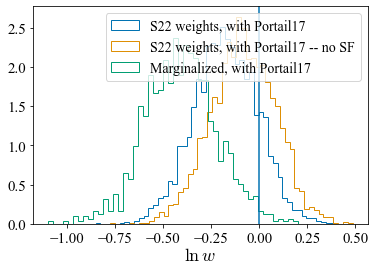

In [17]:
plt.hist(np.array(-mc_s22_ns[0].samples()['ln_w_P']), 
         bins=50, density=True, histtype='step', label='S22 weights, with Portail17');
print(np.exp(-np.nanmedian(np.array(mc_s22_ns[0].samples()['ln_w_P']))),
      np.nanstd(np.exp(-np.array(mc_s22_ns[0].samples()['ln_w_P']))))
plt.hist(np.array(-mc_s22_ns_nosf[0].samples()['ln_w_P']), 
         bins=50, density=True, histtype='step', label='S22 weights, with Portail17 -- no SF');
print(np.exp(np.nanmedian(-np.array(mc_s22_ns_nosf[0].samples()['ln_w_P']))),
      np.nanstd(np.exp(-np.array(mc_s22_ns_nosf[0].samples()['ln_w_P']))))
plt.hist(np.array(-mc_s22_ns_marg[0].samples()['ln_w_P']), 
         bins=50, density=True, histtype='step', label='Marginalized, with Portail17');
print(np.exp(np.nanmedian(-np.array(mc_s22_ns_marg[0].samples()['ln_w_P']))),
      np.nanstd(np.exp(-np.array(mc_s22_ns_marg[0].samples()['ln_w_P']))))
plt.axvline(0.)
plt.xlabel(r'$\ln w$')
plt.legend()

## Spline model for weight 

In [18]:
mc_s22 = run_mcmc_spline(n_d_samples, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True, num_chains=4)
mc_s22_noSF = run_mcmc_spline(n_d_samples_noSF, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True, num_chains=4)

sample: 100%|█| 2400/2400 [00:23<00:00, 102.56it/s, 15 steps of size 2.63e-01. acc. prob=0.85
sample: 100%|█| 2400/2400 [00:20<00:00, 116.89it/s, 15 steps of size 3.01e-01. acc. prob=0.86
sample: 100%|█| 2400/2400 [00:21<00:00, 110.56it/s, 15 steps of size 2.42e-01. acc. prob=0.89
sample: 100%|█| 2400/2400 [00:20<00:00, 116.58it/s, 15 steps of size 2.93e-01. acc. prob=0.86
sample: 100%|█| 2400/2400 [00:23<00:00, 100.78it/s, 15 steps of size 2.54e-01. acc. prob=0.92
sample: 100%|█| 2400/2400 [00:19<00:00, 125.01it/s, 15 steps of size 3.37e-01. acc. prob=0.83
sample: 100%|█| 2400/2400 [00:21<00:00, 109.99it/s, 15 steps of size 2.32e-01. acc. prob=0.93
sample: 100%|█| 2400/2400 [00:21<00:00, 112.48it/s, 15 steps of size 2.77e-01. acc. prob=0.90


In [19]:
mc_s22_alt = run_mcmc_spline(n_d_samples_modified, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True, num_chains=4)

sample: 100%|█| 2400/2400 [00:23<00:00, 101.56it/s, 15 steps of size 2.67e-01. acc. prob=0.87
sample: 100%|█| 2400/2400 [00:21<00:00, 111.64it/s, 15 steps of size 2.84e-01. acc. prob=0.87
sample: 100%|█| 2400/2400 [00:21<00:00, 109.37it/s, 15 steps of size 2.66e-01. acc. prob=0.88
sample: 100%|█| 2400/2400 [00:19<00:00, 122.01it/s, 15 steps of size 3.04e-01. acc. prob=0.80


In [20]:
def run_binned_fits(samples, use_s22_weights):
    return [run_mcmc_no_spline(samples, ppl,ppu,True,use_s22_weights,
                               n_samples=600,init_with_optimization=False,background_model='p17')
            for ppl, ppu in zip(np.nanpercentile(data['period'].values, np.linspace(0.,100.,12))[:-1],
                                np.nanpercentile(data['period'].values, np.linspace(0.,100.,12))[1:])]

mc=run_binned_fits(n_d_samples, True)
mc_marg=run_binned_fits(n_d_samples, False)
mc_noSF=run_binned_fits(n_d_samples_noSF, True)
mc_marg_noSF=run_binned_fits(n_d_samples_noSF, False)

sample: 100%|████████████████████████████████████████████| 1200/1200 [00:35<00:00, 33.71it/s]


In [21]:
mc_full = run_mcmc_spline(n_d_samples, include_background_weight=True, use_s22_weights=False, 
                          knot_spacing='linear', Nknots=default_N_knots, 
                          n_samples=1200, init_with_optimization=True,
                          smoothing_hyperparameter=True,
                          prior_scales = {'ln_Rdisk':0.6, 'ln_Hdisk':0.6, 'ln_sigmaR0':0.3, 'ln_RsigmaR':0.3, 'ln_w_P':3.},
                          scaling_choice = 1.)

sample: 100%|█| 1800/1800 [2:39:22<00:00,  5.31s/it, 127 steps of size 5.59e-02. acc. prob=0.


# Display results

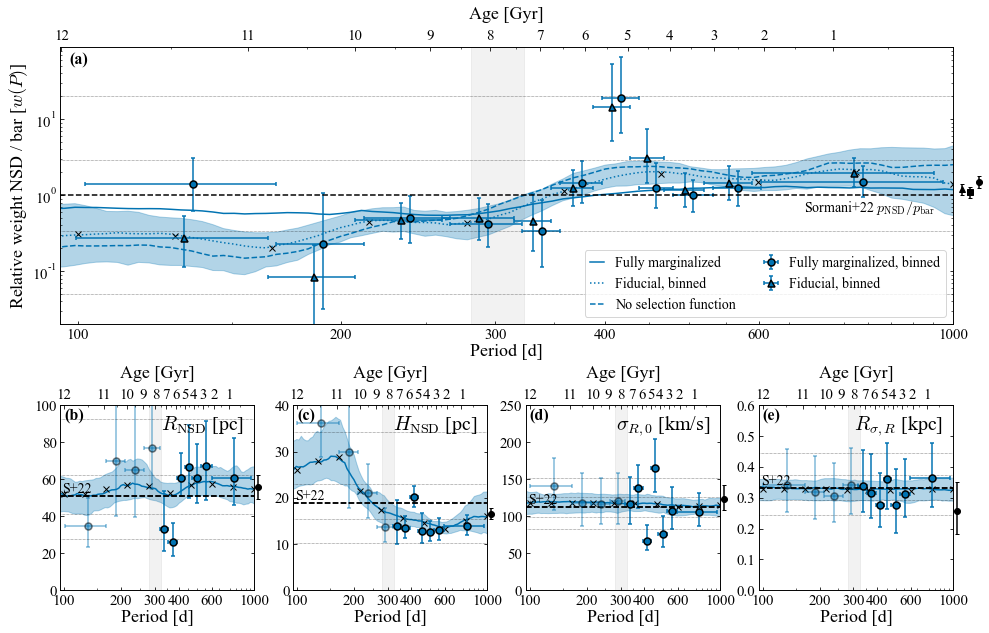

In [22]:
# Grid of results Rdisk, Hdisk, etc.
## =====================
## Plot results
## =====================

import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 2})
from plotting import *

# using gridspec make a grid with four plots on first line and one big one beneath
fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(2,4, hspace=0.35, wspace=0.2, width_ratios=[1,1,1,1], height_ratios=[1.5,1])
ax_top = [fig.add_subplot(gs[1, i]) for i in range(4)]
ax_lower = fig.add_subplot(gs[0, :])

plt.sca(ax_lower)
# plot_spline(mc_noSF, 'ln_w_P', xrr, color=sns.color_palette('colorblind')[0])
xrr = np.linspace(1.9,3.1,100)
plot_spline(mc_full, 'ln_w_P', xrr, color=sns.color_palette('colorblind')[0], 
            one_over=True,display_knots=False,with_bracket=False,ls='-',label='Fully marginalized')
plot_spline(mc_s22, 'ln_w_P', xrr, color=sns.color_palette('colorblind')[0], 
            one_over=True,display_knots=True,ls=':',label='Fiducial, binned')
plot_spline(mc_s22_noSF, 'ln_w_P', xrr, color=sns.color_palette('colorblind')[0], 
            one_over=True,display_knots=False,with_bracket=False,ls='--',label='No selection function')
# plot_errorbar_list(mc, 'ln_w_P', scaling=1., one_over=True, label='S22')
plot_errorbar_list(mc_marg, 'ln_w_P', scaling=1., one_over=True, ps='o', label='Fully marginalized, binned',nudge=0.005)
plot_errorbar_list(mc, 'ln_w_P', scaling=1., one_over=True, ps='^', label='Fiducial, binned',nudge=-0.005)

plt.errorbar([3.01],[np.nanmedian(np.exp(mc_s22_ns[0].samples()['ln_w_P']))],
             yerr = np.vstack([np.nanmedian(np.exp(mc_s22_ns[0].samples()['ln_w_P']))-np.nanpercentile(np.exp(mc_s22_ns[0].samples()['ln_w_P']),16.),
                               -np.nanmedian(np.exp(mc_s22_ns[0].samples()['ln_w_P']))+np.nanpercentile(np.exp(mc_s22_ns[0].samples()['ln_w_P']),84.)]),
             fmt='k^',clip_on=False)
plt.errorbar([3.02],[np.nanmedian(np.exp(mc_s22_ns_nosf[0].samples()['ln_w_P']))],
             yerr = np.vstack([np.nanmedian(np.exp(mc_s22_ns_nosf[0].samples()['ln_w_P']))-np.nanpercentile(np.exp(mc_s22_ns_nosf[0].samples()['ln_w_P']),16.),
                               -np.nanmedian(np.exp(mc_s22_ns_nosf[0].samples()['ln_w_P']))+np.nanpercentile(np.exp(mc_s22_ns_nosf[0].samples()['ln_w_P']),84.)]),
             fmt='ks',ls='dashed',clip_on=False)
plt.errorbar([3.03],[np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()['ln_w_P']))],
             yerr = np.vstack([np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()['ln_w_P']))-np.nanpercentile(np.exp(mc_s22_ns_marg[0].samples()['ln_w_P']),16.),
                               -np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()['ln_w_P']))+np.nanpercentile(np.exp(mc_s22_ns_marg[0].samples()['ln_w_P']),84.)]),
             fmt='ko',clip_on=False)
delta_priors = np.float64(mc_full.parameters['ln_w_P'].scale[0])
plt.axhline(np.exp(delta_priors), ls='dotted', color='black', lw=0.5)
plt.axhline(np.exp(-delta_priors), ls='dotted', color='black', lw=0.5)
delta_priors = width_1
plt.axhline(np.exp(delta_priors), ls='dotted', color='black', lw=0.5)
plt.axhline(np.exp(-delta_priors), ls='dotted', color='black', lw=0.5)


plt.legend(loc='lower right', ncol=2, handlelength=1)
plt.ylim(0.,9.)
plt.axhline(1.,ls='dashed', color='black')
# plt.ylabel(r'$[p_\mathrm{NSD}(P)/p_\mathrm{bar}(P)]/[p_\mathrm{NSD}/p_\mathrm{bar}]_\mathrm{S+22}(P)$')
plt.ylabel('Relative weight NSD / bar [$w(P)$]')
shade_bfa(add_label=False)
format_period_axis()
plt.annotate('Sormani+22 $p_\mathrm{NSD}/p_\mathrm{bar}$', (2.98,0.9), fontsize=14,ha='right',va='top')
plt.semilogy()
plt.ylim(2e-2,9e1)
plt.xlim(2.,3.)
plt.annotate('(a)',xy=(0.01,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')

if aux_params['df_type']=='quasiisothermal':
    keys = ['ln_Rdisk', 'ln_Hdisk', 'ln_sigmaR0', 'ln_RsigmaR']#, 'ln_w_P']
    label_lookup = {'ln_Rdisk': r'$R_\mathrm{NSD}$ [pc]',
                    'ln_Hdisk': r'$H_\mathrm{NSD}$ [pc]',
                    'ln_sigmaR0': r'$\sigma_{R,0}$ [km/s]',
                    'ln_RsigmaR': r'$R_{\sigma,R}$ [kpc]',
                    'ln_w_P': r'$w(P)$'}
    scalings = {'ln_Rdisk': 1000.,
                'ln_Hdisk': 1000.,
                'ln_sigmaR0': 1.,
                'ln_RsigmaR': 1.,
                'ln_w_P': 1.}

else:
    keys = ['ln_Rdisk', 'ln_Hdisk', 'ln_sigmaR0', 'ln_RsigmaR', 'ln_w_P', 'ln_Rho0', 'ln_q']
alpha_lbls = ['(b)','(c)','(d)','(e)']
for i, k in enumerate(keys):
    plt.sca(ax_top[i])
    plt.annotate(alpha_lbls[i],xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')

    plot_spline(mc_full, k, xrr, color=sns.color_palette('colorblind')[0], 
            one_over=False,display_knots=True,ls='-',scaling=scalings[k])
    plot_errorbar_list(mc_marg, k, scaling=scalings[k], one_over=False,fade=np.log10(300.))
    plt.errorbar([3.02],[scalings[k]*np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()[k]))],
                yerr = scalings[k]*np.vstack([np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()[k]))
                                  -np.nanpercentile(np.exp(mc_s22_ns_marg[0].samples()[k]),16.),
                                -np.nanmedian(np.exp(mc_s22_ns_marg[0].samples()[k]))
                                +np.nanpercentile(np.exp(mc_s22_ns_marg[0].samples()[k]),84.)]),
                fmt='ko',clip_on=False)
    delta_priors = np.float64(mc_full.parameters[k].scale[0])
    plt.axhline(np.exp(min_results_s22.x[i])*scalings[k], ls='dashed', color='black')
    plt.axhline(np.exp(min_results_s22.x[i]+delta_priors)*scalings[k], ls='dotted', color='black', lw=0.5)
    plt.axhline(np.exp(min_results_s22.x[i]-delta_priors)*scalings[k], ls='dotted', color='black', lw=0.5)
    delta_priors = width_03
    if k == 'ln_Rdisk' or k == 'ln_Hdisk':
        delta_priors = width_06
    plt.axhline(np.exp(min_results_s22.x[i])*scalings[k], ls='dashed', color='black')
    plt.axhline(np.exp(min_results_s22.x[i]+delta_priors)*scalings[k], ls='dotted', color='black', lw=0.5)
    plt.axhline(np.exp(min_results_s22.x[i]-delta_priors)*scalings[k], ls='dotted', color='black', lw=0.5)

    plt.annotate('S+22', (1.99, np.exp(min_results_s22.x[i])*scalings[k]), xycoords='data', ha='left', va='bottom', fontsize=14)
    
    if k=='ln_Rdisk':
        plt.ylim(0.,0.1*scalings[k])
    elif k=='ln_Hdisk':
        plt.ylim(0.,0.040*scalings[k])
    elif k=='ln_sigmaR0':
        plt.ylim(0.,250.)
    elif k=='ln_RsigmaR':
        plt.ylim(0.,0.6)

    # add annotation top right
    plt.annotate(label_lookup[k], (0.95,0.95), fontsize=20,ha='right',va='top', xycoords='axes fraction')
    shade_bfa(add_label=False)

    format_period_axis()
    
plt.savefig('plots/parameters.pdf', bbox_inches='tight')

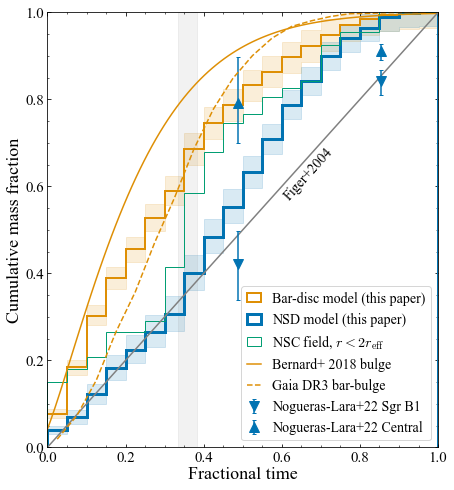

In [23]:
def add_nl_points():
        NL_max_age = 13.7
        nl,e_nl = np.array([42.,42.,7.7,2.2,5.7]), np.array([11.,11.,1.0,0.7,1.3])
        smp_nl = np.random.normal(nl,e_nl,(10000,5))
        med__=np.nanpercentile(np.cumsum(smp_nl,axis=1)/np.sum(smp_nl,axis=1)[:,np.newaxis],[16.,50.,84.],axis=0).T
        plt.errorbar([1-7/NL_max_age,1-2/NL_max_age],
                        med__[:2,1],
                        yerr=np.array([med__[:2,1]-med__[:2,0],
                                med__[:2,2]-med__[:2,1]]),
                        fmt='v', ms=10,color=sns.color_palette('colorblind')[0],label='Nogueras-Lara+22 Sgr B1')

        NL_max_age = 13.7
        nl,e_nl = np.array([79.,12.,4.9,0.7,3.2]), np.array([12.,12.,0.8,0.2,0.4])
        smp_nl = np.random.normal(nl,e_nl,(10000,5))
        med__=np.nanpercentile(np.cumsum(smp_nl,axis=1)/np.sum(smp_nl,axis=1)[:,np.newaxis],[16.,50.,84.],axis=0).T
        plt.errorbar(np.array([1-7/NL_max_age,1-2/NL_max_age,1-0.5/NL_max_age])[:2],
                        med__[:2,1],
                        yerr=np.array([med__[:,1]-med__[:,0],
                                med__[:,2]-med__[:,1]])[:,:2],
                        fmt='^', ms=10,color=sns.color_palette('colorblind')[0],label='Nogueras-Lara+22 Central')
                        
def comparison_plot(mc_s22):
        f=plt.figure(figsize=(7,8))

        _,test_spline = spline_marginalization(mc_s22.aux_parameters['aux_knots'], 
                                                np.array(mc_s22.samples()['ln_w_P']),
                                                jnp.log10(data['period'].values))
        AGE_NORM = 12.
        which='pF'
        rfw = np.exp(n_d_samples_noSF[f'denom_{which}weights']-n_d_samples[f'denom_{which}weights'])
        bar_weight = rfw*((age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[1])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[1])))
        _,b_d,_=plt.hist(1-age_period(data['period'])/AGE_NORM,bins=20,range=[0.,1.], weights=bar_weight,
                histtype='step',density=True,color=sns.color_palette('colorblind')[1],cumulative=True,linewidth=2,label='Bar-disc model (this paper)');
        VAR,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d, weights=bar_weight**2);
        N,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d,weights=bar_weight);
        plt.legend(loc='lower right')

        def norm_sum(x):
                return np.cumsum(x)/np.sum(x)
        def var_sum(y,x):
            return np.cumsum(y)/np.sum(x)**2
                
        mid = .5*(b_d[1:]+b_d[:-1])
        n_lower,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d,
                weights=rfw*(age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[0])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[0])),density=True);
        n_upper,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d,
                weights=rfw*(age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[2])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[2])),density=True);
        plt.fill_between(np.concatenate([[-b_d[1]+b_d[0]+mid[0]],mid,[b_d[1]-b_d[0]+mid[-1]]]),
                        np.concatenate([[0.],norm_sum(N)-np.sqrt((norm_sum(n_lower)-norm_sum(N))**2+var_sum(VAR,N)),[0.]]),
                        np.concatenate([[0.],norm_sum(N)+np.sqrt((norm_sum(n_upper)-norm_sum(N))**2+var_sum(VAR,N)),[0.]]),alpha=0.15,step='mid',
                        color=sns.color_palette('colorblind')[1])

        which='pF'
        rfw = np.exp(n_d_samples_noSF[f'denom_nsdweights']-n_d_samples[f'denom_nsdweights'])
        nsd_weight = rfw*((age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_nsdweights'])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_pFweights'])*np.exp(test_spline[1])))
        _,b_d,_=plt.hist(1-age_period(data['period'])/AGE_NORM,bins=20,range=[0.,1.], weights=nsd_weight,
                histtype='step',density=True,color=sns.color_palette('colorblind')[0],cumulative=True,linewidth=3,label='NSD model (this paper)');
        VAR,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d, weights=nsd_weight**2);
        N,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d, weights=nsd_weight);

        def norm_sum(x):
                return np.cumsum(x)/np.sum(x)
        mid = .5*(b_d[1:]+b_d[:-1])
        n_lower,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d,
                weights=rfw*(age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_nsdweights'])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[0])),density=True);
        n_upper,_=np.histogram(1-age_period(data['period'])/AGE_NORM,bins=b_d,
                weights=rfw*(age_period(data['period']))**0.48*np.exp(n_d_samples[f'denom_nsdweights'])/
                (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_pFweights'])*np.exp(test_spline[2])),density=True);
        plt.fill_between(np.concatenate([[-b_d[1]+b_d[0]+mid[0]],mid,[b_d[1]-b_d[0]+mid[-1]]]),
                        np.concatenate([[0.],norm_sum(N)-np.sqrt((norm_sum(n_lower)-norm_sum(N))**2+var_sum(VAR,N)),[0.]]),
                        np.concatenate([[0.],norm_sum(N)+np.sqrt((norm_sum(n_upper)-norm_sum(N))**2+var_sum(VAR,N)),[0.]]),alpha=0.15,step='mid',
                        color=sns.color_palette('colorblind')[0])


        nsc_fltr = (np.hypot((data['l']-360.*(data['l']>180.))-ssA[1], data['b']-ssA[2])<np.rad2deg(4.2/8275.)*2.)
        plt.hist((1-age_period(data['period'])/AGE_NORM)[nsc_fltr],bins=b_d,
                 weights=age_period(data['period'])[nsc_fltr]**0.48,density=True,cumulative=True,
                 color=sns.color_palette()[2],histtype='step',
                 label='NSC field, $r<2r_\mathrm{eff}$');
        
        xx = np.linspace(0.01,13.99,100)
        BERNARD_MAX_AGE = 13.7
        plt.plot(1-xx/BERNARD_MAX_AGE,1-np.exp(-((14-(xx-0.01))/14.*4.)**1.3),color=sns.color_palette('colorblind')[1],label='Bernard+ 2018 bulge')

        plt.plot(xx/14., xx/14., color='gray')
        plt.xlim(0,1)
        plt.xlabel('Fractional time')
        plt.ylabel('Cumulative mass fraction')
        plt.ylim(0.,1.)
        add_inner_ticks()

        add_nl_points()

        plt.axvspan(1-(7.3+0.7)/12,1-(6.7+0.7)/12, color='gray', alpha=0.1)

        plt.annotate('Figer+2004', rotation=48, xy=(0.6,0.57), fontsize=14)

        gaia_cumulative = np.load('gaia_cumulative.npy')
        plt.plot(gaia_cumulative[1],gaia_cumulative[0],color=sns.color_palette('colorblind')[1],label='Gaia DR3 bar-bulge',ls='dashed')


        plt.legend(loc='lower right',handlelength=1.)

comparison_plot(mc_s22)
plt.savefig('plots/bernard_comparison.pdf',bbox_inches='tight')

In [88]:
# age distribution plot
import seaborn as sns
from scipy.stats import gaussian_kde

def make_age_distribution_plot(model, n_d_samples, fig=None, sfh=True, with_gc=True, reweight=None, add_labels=True, include_poisson=True):

    if fig is None: 
        fig=plt.figure(figsize=[7.,5.])


    _,test_spline = spline_marginalization(model.aux_parameters['aux_knots'], 
                                         np.array(model.samples()['ln_w_P']),
                                         jnp.log10(data['period'].values))
    
    which = {'p17':'pF', 'dd':'dd'}[model.aux_parameters['background_model']]

    def extra_weight(age):
        if sfh:
            return age**0.48
        return np.ones_like(age)
    

    def plot_hist_weight(weight_, color=sns.color_palette('colorblind')[0], print_=False):

        _,b_d,_=plt.hist(age_period(data['period']),bins=20,range=[0.5,10.5+1.5*with_gc], weights=weight_[1], 
                        histtype='step',density=True,color=color);
        sns.kdeplot(age_period(data['period']), bw_adjust=0.5, weights=weight_[1], color=color)
        GK=gaussian_kde(age_period(data['period']), weights=weight_[1], bw_method=0.5*len(data) ** (-1 / 5.))

        if print_:
            xxy = np.linspace(5.,11.,1000)
            print(.5*(xxy[1:]+xxy[:-1])[np.argmax(np.abs(np.diff(GK(xxy))))])

        n_d,_=np.histogram(age_period(data['period']),bins=b_d,weights=weight_[1])
        VARn_d,_=np.histogram(age_period(data['period']),bins=b_d,weights=weight_[1]**2);
        norm = np.sum(n_d)*np.diff(b_d)[0]
        
        n_lower,_=np.histogram(age_period(data['period']), bins=b_d, weights=weight_[0]);
        n_lower = (n_d-np.sqrt(include_poisson*VARn_d+(n_lower/np.sum(n_lower)-n_d/np.sum(n_d))**2*np.sum(n_d)**2))/norm
        n_upper,_=np.histogram(age_period(data['period']), bins=b_d, weights=weight_[2]);
        n_upper = (n_d+np.sqrt(include_poisson*VARn_d+(n_upper/np.sum(n_upper)-n_d/np.sum(n_d))**2*np.sum(n_d)**2))/norm
        
        mid = .5*(b_d[1:]+b_d[:-1])
        plt.fill_between(np.concatenate([mid,[b_d[1]-b_d[0]+mid[-1]]]),np.concatenate([n_lower,[0.]]),np.concatenate([n_upper,[0.]]),
                        alpha=0.15,step='mid',
                        color=color)

    if not model.aux_parameters['use_s22_weights']:
        denom = recompute_denom(model, n_d_samples) 
        denom_noSF = recompute_denom(model, reweight) 
    else:
        denom = n_d_samples['denom_nsdweights']
        if reweight is not None:
            denom_noSF = reweight['denom_nsdweights']

    if reweight is not None:
        rfw = np.exp(reweight[f'denom_{which}weights']-n_d_samples[f'denom_{which}weights'])
    else:
        rfw = 1.

    bar_weight = [rfw*(extra_weight(age_period(data['period']))*np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[i])/
            (np.exp(denom)+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[i]))) for i in range(3)]
    
    plot_hist_weight(bar_weight, color=sns.color_palette('colorblind')[1], print_=False)

    if reweight is not None:
        rfw = np.exp(denom_noSF - denom)
    else:
        rfw = 1.

    nsd_weight = [rfw*extra_weight(age_period(data['period']))*np.exp(denom)/\
                  (np.exp(denom)+np.exp(n_d_samples[f'denom_{which}weights'])*np.exp(test_spline[i])) for i in range(3)]

    plot_hist_weight(nsd_weight, color=sns.color_palette('colorblind')[0], print_=True)
    # xx = np.linspace(0.,14.,1000)
    # plt.plot(xx/1.2,((1-np.exp(-((14-(xx-0.01))/14.*4.)**1.3))-(1-np.exp(-((14-xx)/14.*4.)**1.3)))/0.01,color='k')

    if add_labels:
        # plt.annotate('"Background" disc', xy=(6.,0.03), fontsize=12,ha='center')
        plt.annotate('Background\nbar-bulge/disc', xy=(10.5,0.215), fontsize=14,ha='center')

        plt.annotate('NSD', xy=(6.2,0.16), fontsize=16,ha='center')

        if with_gc==True:
            delta=0.7
        else:
            delta=0.

        plt.axvspan(6.8+delta,7.8+delta,color='k',alpha=0.1)
        plt.annotate('Bar formation epoch', rotation=90, xy=(7.3+delta,0.17), fontsize=15,ha='center')

    plt.ylim(0.,0.26)

    from plotting_general import add_inner_ticks
    add_inner_ticks()
    plt.xlim(0.,10.5+1.5*with_gc)

    plt.xlabel('Age [Gyr]')
    plt.ylabel('Age distribution [Gyr$^{-1}$]')
    if sfh:
        plt.ylabel('Star formation history [$\propto M_\odot$ Gyr$^{-1}$]')


7.891891891891892


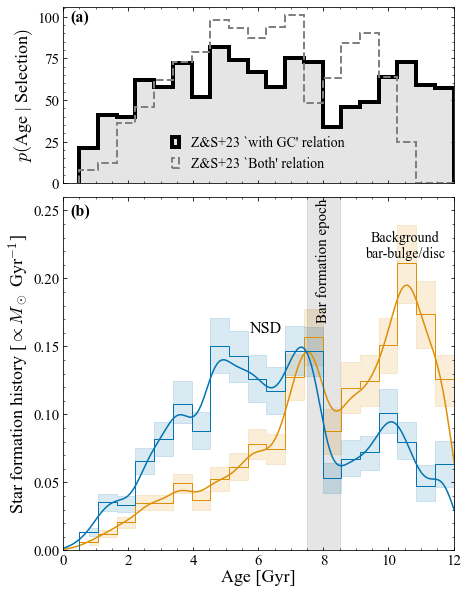

In [89]:
def sfh_plot(model):
    f,a=plt.subplots(2,1,figsize=(7,10),gridspec_kw={'height_ratios':[0.5,1.]},sharex=True)
    plt.subplots_adjust(hspace=0.05)

    plt.sca(a[0])
    plt.hist(age_period(data["period"], with_gc=True), bins=20, histtype="step", lw=4, range=[0.5,12.], color='k',
            label="Z&S+23 `with GC' relation");
    plt.hist(age_period(data["period"], with_gc=True), bins=20, histtype="stepfilled", lw=4, range=[0.5,12.], color='k',alpha=0.1)
    plt.hist(age_period(data["period"], with_gc=False), bins=20, histtype="step", lw=2, range=[0.5,12.], color='gray',
            label="Z&S+23 `Both' relation",ls='dashed');
    plt.legend(loc='lower center', fontsize=14,handlelength=0.5,frameon=False)

    add_inner_ticks()

    plt.ylabel('$p($Age | Selection$)$')

    plt.sca(a[1])
    make_age_distribution_plot(model,n_d_samples,a[1], reweight=n_d_samples_noSF, sfh=True)
    plt.sca(a[0])
    plt.annotate('(a)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
    plt.sca(a[1])
    plt.annotate('(b)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
    plt.savefig('plots/sfh.pdf', bbox_inches='tight')

sfh_plot(mc_s22)

7.897897897897898


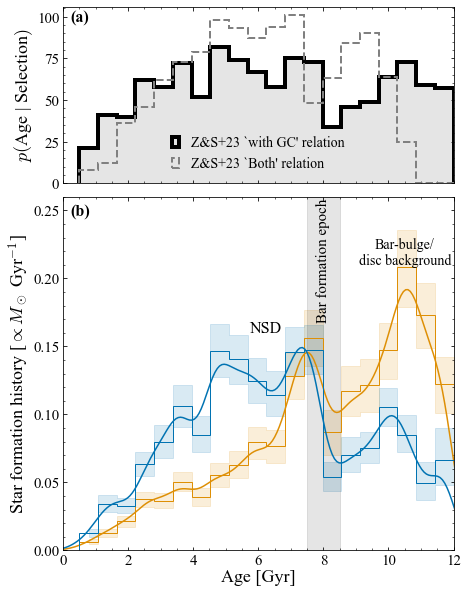

In [83]:
def sfh_plot(model):
    f,a=plt.subplots(2,1,figsize=(7,10),gridspec_kw={'height_ratios':[0.5,1.]},sharex=True)
    plt.subplots_adjust(hspace=0.05)

    plt.sca(a[0])
    plt.hist(age_period(data["period"], with_gc=True), bins=20, histtype="step", lw=4, range=[0.5,12.], color='k',
            label="Z&S+23 `with GC' relation");
    plt.hist(age_period(data["period"], with_gc=True), bins=20, histtype="stepfilled", lw=4, range=[0.5,12.], color='k',alpha=0.1)
    plt.hist(age_period(data["period"], with_gc=False), bins=20, histtype="step", lw=2, range=[0.5,12.], color='gray',
            label="Z&S+23 `Both' relation",ls='dashed');
    plt.legend(loc='lower center', fontsize=14,handlelength=0.5,frameon=False)

    add_inner_ticks()

    plt.ylabel('$p($Age | Selection$)$')

    plt.sca(a[1])
    make_age_distribution_plot(model,n_d_samples,a[1], reweight=n_d_samples_noSF, sfh=True)
    plt.sca(a[0])
    plt.annotate('(a)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
    plt.sca(a[1])
    plt.annotate('(b)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
    plt.savefig('plots/sfh.pdf', bbox_inches='tight')

sfh_plot(mc_s22)
plt.savefig('plots/sfh.pdf', bbox_inches='tight')

In [29]:
## ===================================
## Generate samples for MAP parameters
## ===================================
from model import generate_samples

samples_map=generate_samples(mc_s22, bar_model, data=data, add_errors=True, Nsamples=150000, SF=SF)

Using S22 weights
Including background
Spline model for relative weight


If these two sets of distributions look similar I think the reweighting works correctly


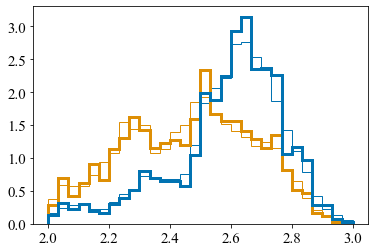

In [30]:
## Check if the reweighting works correctly
print('If these two sets of distributions look similar I think the reweighting works correctly')
plt.hist(samples_map[:,6][(samples_map[:,-1]<0.5)],bins=30,histtype='step',range=[2,3],density=True,color=sns.color_palette('colorblind')[0]);
plt.hist(samples_map[:,6][(samples_map[:,-1]>0.5)],bins=30,histtype='step',range=[2,3],density=True,color=sns.color_palette('colorblind')[1]);

xrr = jnp.linspace(1.98,3.,100)
test_spline = [InterpolatedUnivariateSpline(mc_s22.aux_parameters['aux_knots'], 
                                            np.nanpercentile(np.array(mc_s22.samples()['ln_w_P']), x, axis=0), k=3) 
                for x in [16,50,84]]

# test_spline=[None,lambda x: np.ones_like(x)*run_optimization_no_spline(n_d_samples_nopml, 100.,1000.,True,'dd',True).x[0], None]

n_d,b_d,_=plt.hist(np.log10(data['period']),bins=30,range=[2.,3.],
         weights=np.exp(n_d_samples['denom_pFweights'])*np.exp(test_spline[1](jnp.log10(data['period'].values)))/
         (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples['denom_pFweights'])*np.exp(test_spline[1](jnp.log10(data['period'].values)))),
         histtype='step',density=True,color=sns.color_palette('colorblind')[1],lw=3);

n_d,b_d,_=plt.hist(np.log10(data['period']),bins=30,range=[2.,3.],
         weights=np.exp(n_d_samples['denom_nsdweights'])/
         (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples['denom_pFweights'])*np.exp(test_spline[1](jnp.log10(data['period'].values)))),
         histtype='step',density=True,color=sns.color_palette('colorblind')[0],lw=3);

In [74]:
# Velocity plot grid

from plotting_general import add_inner_ticks
from statsmodels.stats.rates import confint_poisson


def w_(x,y=None):
    if y is not None:
        return np.ones(np.count_nonzero(y))/np.count_nonzero(x)
    return np.ones(np.count_nonzero(x))/np.count_nonzero(x)

def r_(x):
    return np.abs(x-360.*(x>180.))

def make_panel(data_fltr, fltr, samples, fld):
    
    fld_no = {'pml':3, 'pmb':4, 'joint_rv':5}[fld]
    rangex = {'pml':[-70,10], 'pmb':[-40,40], 'joint_rv':[-310,310]}[fld]

    bbins=np.histogram_bin_edges(data[fld].values[data_fltr],bins='fd',range=rangex)
    bbins= 10 if fld=='joint_rv' else 15 
    n_d,b_d,_=plt.hist(data[fld].values[data_fltr],bins=bbins,histtype='step',color='gray',lw=2.5,label='Data');
    lower,upper=confint_poisson(n_d,1.,method='exact-c',alpha=1-0.6827)
    plt.fill_between(np.concatenate([[-(b_d[1]-b_d[0])+.5*(b_d[1:]+b_d[:-1])[0]],.5*(b_d[1:]+b_d[:-1]),[b_d[1]-b_d[0]+.5*(b_d[1:]+b_d[:-1])[-1]]]),
                    np.concatenate([[0.],lower,[0.]]),np.concatenate([[0.],upper,[0.]]),
                    alpha=0.15,step='mid',
                    color='gray')
    
    plt.xlim(*rangex)

    from scipy.stats import gaussian_kde

    mid = np.linspace(*rangex,100)
    KK=gaussian_kde(samples[:,fld_no][(samples[:,-1]<0.5)&fltr],weights=w_(fltr,(samples[:,-1]<0.5)&fltr))
    l,=plt.plot(mid,KK.evaluate(mid)*np.count_nonzero(data_fltr)*np.diff(b_d)[0]*np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero(fltr),
            color=sns.color_palette('colorblind')[0],lw=1.3,label='NSD')
    l.set_dashes([3,1])

    KK=gaussian_kde(samples[:,fld_no][(samples[:,-1]>0.5)&fltr],weights=w_(fltr,(samples[:,-1]>0.5)&fltr))
    l,=plt.plot(mid,KK.evaluate(mid)*np.count_nonzero(data_fltr)*np.diff(b_d)[0]*np.count_nonzero((samples[:,-1]>0.5)&fltr)/np.count_nonzero(fltr),
            color=sns.color_palette('colorblind')[1],lw=1.3,label='Bar')
    l.set_dashes([5,2])

    KK=gaussian_kde(samples[:,fld_no][fltr],weights=w_(fltr))
    plt.plot(mid,KK.evaluate(mid)*np.count_nonzero(data_fltr)*np.diff(b_d)[0],color=sns.color_palette('colorblind')[2],lw=2,label='Total')

    axhline = -6.411*4.74 if fld=='pml' else -7.25/8.275
    plt.axvline(axhline,color='k',ls='--',lw=1.5)

    add_inner_ticks()

def make_velocity_plot_grid(samples):
    per_grid = [100,200,250,300,350,400,500,600,1000]

    f,a=plt.subplots(3,len(per_grid)-1,figsize=(18,7.5),sharey=False,sharex=False)
    plt.subplots_adjust(hspace=0.4,wspace=0.03)

    for j, (pl, pu) in enumerate(zip(per_grid[:-1],per_grid[1:])):
        per_bin = [pl,pu]
        for i, fld in enumerate(['pml', 'pmb', 'joint_rv']):
            plt.sca(a[i][j])

            data_fltr = (np.abs(data['b'])<0.4)&(data['period']<per_bin[1])&(data['period']>per_bin[0])&(data[fld]>-1000)
            if np.count_nonzero(data_fltr)<7:
                plt.axis('off')
                continue
            fltr = (np.abs(samples[:,1])<np.deg2rad(0.4))&(samples[:,6]<np.log10(per_bin[1]))&(samples[:,6]>np.log10(per_bin[0]))

            make_panel(data_fltr, fltr, samples, fld)

            if i==0:
                plt.annotate(f'$N$={np.count_nonzero(data_fltr)}',xy=(0.02,0.95),xycoords='axes fraction',fontsize=19,va='top',ha='left')
            if i==1:
                # plt.annotate(r'$\frac{p_\mathrm{NSD}}{p_\mathrm{Bar}} = %0.1f$'%(np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero((samples[:,-1]>0.5)&fltr)),
                            # xy=(0.02,0.95),xycoords='axes fraction',fontsize=13,va='top',ha='left')
                plt.annotate(r'$\frac{\mathrm{NSD}}{\mathrm{Bar}}\,$''\u003D'r'$\,%0.1f$'%(np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero((samples[:,-1]>0.5)&fltr)),
                            xy=(0.02,0.95),xycoords='axes fraction',fontsize=14.7,va='top',ha='left')

            if i==0:
                plt.title(r'$P\in$[%i, %i] d''\n'r'$\tau\in$[%0.1f, %0.1f] Gyr'%(
                                                            per_bin[0],
                                                            per_bin[1],
                                                            age_period(per_bin[0]),
                                                            age_period(per_bin[1])),fontsize=15)
            # turn off y tick labels
            plt.gca().set_yticklabels([])
            plt.grid(lw=0.2)

            if j==3:
                plt.xlabel(r'$\mu_%s\,[\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1}]$'%('\ell' if fld=='pml' else 'b'),
                        x=1.1,ha='center',fontsize=18)
            if j==6 and i==2:
                plt.xlabel(r'$v_\mathrm{los} [\mathrm{km\,s}^{-1}]$',fontsize=18)
            if j==2 and i==1:
                plt.legend(handlelength=2,ncol=2,loc='lower left',bbox_to_anchor=(1.1,-1.3),fontsize=15,borderpad=0.6,handletextpad=0.5,frameon=False)


def make_velocity_plot_grid_onsky(samples):
    l_grid = [0.,0.4,0.8,1.2,1.5]
    b_grid = [0.,0.1,0.2,0.3,0.4]

    f,a=plt.subplots(3,len(b_grid)+len(l_grid)-1,figsize=(18,7.5),sharey=False,sharex=False,gridspec_kw={'width_ratios':[1,1,1,1,0.1,1,1,1,1]})
    plt.subplots_adjust(hspace=0.4,wspace=0.03)

    for i in range(3):
        plt.sca(a[i][4])
        plt.axis('off')

    for j, (ll, lu) in enumerate(zip(l_grid[:-1],l_grid[1:])):
        l_bin = [ll,lu]
        for i, fld in enumerate(['pml', 'pmb', 'joint_rv']):
            plt.sca(a[i][j])
            data_fltr = (np.abs(data['b'])<0.4)&(r_(data['l'])<l_bin[1])&(r_(data['l'])>l_bin[0])&(data[fld]>-1000)

            if np.count_nonzero(data_fltr)<7:
                plt.axis('off')
                continue

            fltr = (np.abs(samples[:,1])<np.deg2rad(0.4))&(np.abs(np.rad2deg(samples[:,0]))<l_bin[1])&(np.abs(np.rad2deg(samples[:,0]))>l_bin[0])
            make_panel(data_fltr, fltr, samples, fld)

            if i==0:
                plt.annotate(f'$N$={np.count_nonzero(data_fltr)}',xy=(0.02,0.95),xycoords='axes fraction',fontsize=19,va='top',ha='left')
            if i==1:
                # plt.annotate(r'$\frac{p_\mathrm{NSD}}{p_\mathrm{bar}} = %0.1f$'%(np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero((samples[:,-1]>0.5)&fltr)),
                #             xy=(0.02,0.95),xycoords='axes fraction',fontsize=13,va='top',ha='left')
                plt.annotate(r'$\frac{\mathrm{NSD}}{\mathrm{Bar}}\,$''\u003D'r'$\,%0.1f$'%(np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero((samples[:,-1]>0.5)&fltr)),
                            xy=(0.02,0.95),xycoords='axes fraction',fontsize=14.4,va='top',ha='left')

            
            if i==0:
                plt.title(r'$|\ell|\in$[%0.1f, %0.1f] deg'%(l_bin[0],
                                                            l_bin[1]),fontsize=15)
            # turn off y tick labels
            plt.gca().set_yticklabels([])
            plt.grid(lw=0.2)

            if j==3 and i<2:
                plt.xlabel(r'$\mu_%s\,[\mathrm{km\,s}^{-1}\,\mathrm{kpc}^{-1}]$'%('\ell' if fld=='pml' else 'b'),
                        x=1.1,ha='center',fontsize=18)
            if j==2 and i==1:
                plt.legend(handlelength=2,ncol=1,loc='lower left',bbox_to_anchor=(1.1,-1.5),fontsize=15,borderpad=0.6,handletextpad=0.5,frameon=False)

    for j, (bl, bu) in enumerate(zip(b_grid[:-1],b_grid[1:])):
        b_bin = [bl,bu]
        for i, fld in enumerate(['pml', 'pmb', 'joint_rv']):
            plt.sca(a[i][j+5])
            data_fltr = (np.abs(data['b'])<0.4)&(r_(data['b'])<b_bin[1])&(r_(data['b'])>b_bin[0])&(data[fld]>-1000)

            if np.count_nonzero(data_fltr)<7:
                plt.axis('off')
                continue

            fltr = (np.abs(samples[:,1])<np.deg2rad(0.4))&(np.abs(np.rad2deg(samples[:,1]))<b_bin[1])&(np.abs(np.rad2deg(samples[:,1]))>b_bin[0])
            make_panel(data_fltr, fltr, samples, fld)

            if i==0:
                plt.annotate(f'$N$={np.count_nonzero(data_fltr)}',xy=(0.02,0.95),xycoords='axes fraction',fontsize=19,va='top',ha='left')
            if i==1:
                plt.annotate(r'$\frac{\mathrm{NSD}}{\mathrm{Bar}}\,$''\u003D'r'$\,%0.1f$'%(np.count_nonzero((samples[:,-1]<0.5)&fltr)/np.count_nonzero((samples[:,-1]>0.5)&fltr)),
                            xy=(0.02,0.95),xycoords='axes fraction',fontsize=14.4,va='top',ha='left')
            if i==0:
                plt.title(r'$|b|\in$[%0.1f, %0.1f] deg'%(b_bin[0],
                                                            b_bin[1]),fontsize=15)
            if j==0 and i==2:
                plt.xlabel(r'$v_\mathrm{los} [\mathrm{km\,s}^{-1}]$',fontsize=18,x=-0.1,ha='center')
            # turn off y tick labels
            plt.gca().set_yticklabels([])
            plt.grid(lw=0.2)


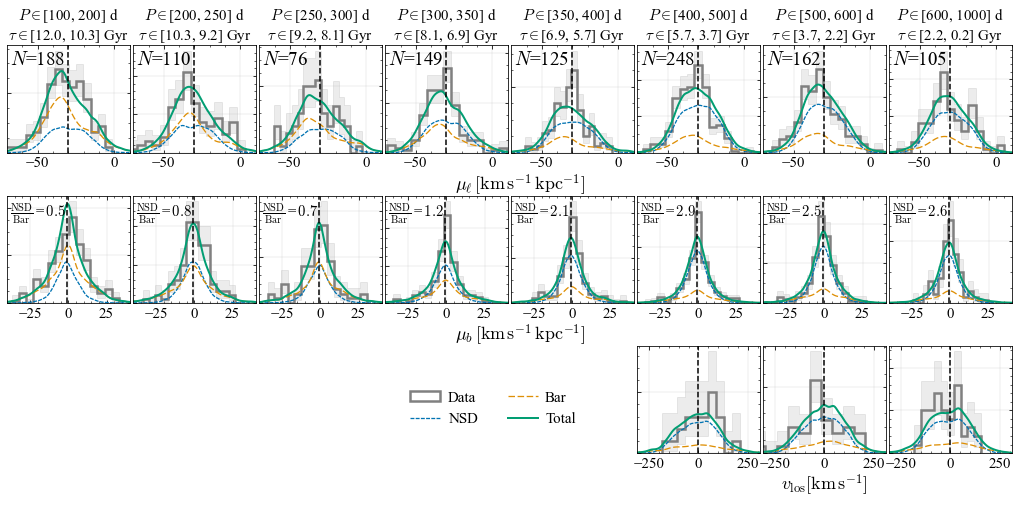

In [75]:
make_velocity_plot_grid(samples_map)
plt.savefig('plots/veldists.pdf', bbox_inches='tight')

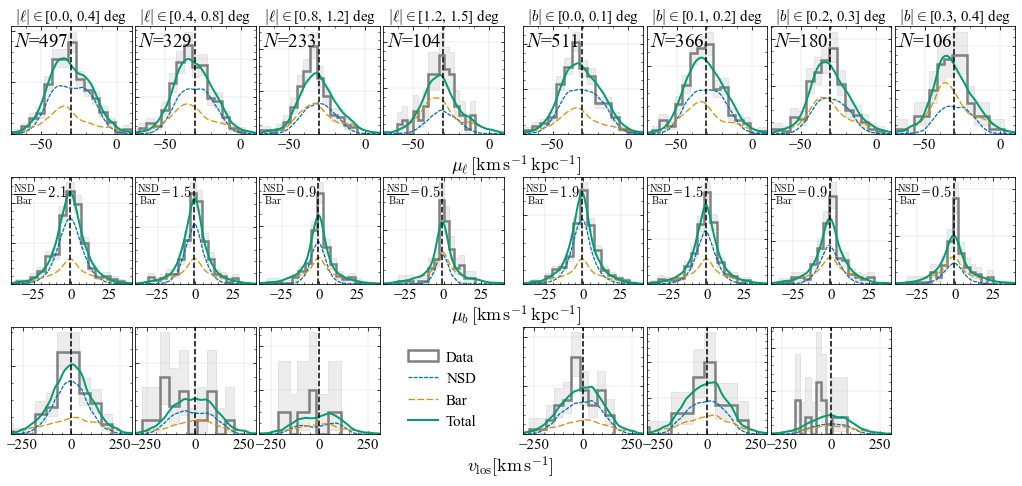

In [76]:
make_velocity_plot_grid_onsky(samples_map)
plt.savefig('plots/veldists_onsky.pdf', bbox_inches='tight')

## Outside view

In [34]:
outside_samples_map=generate_samples(mc_s22, bar_model, data=None, add_errors=False, Nsamples=500000,onskylimit=5.)

Using S22 weights
Including background
Spline model for relative weight


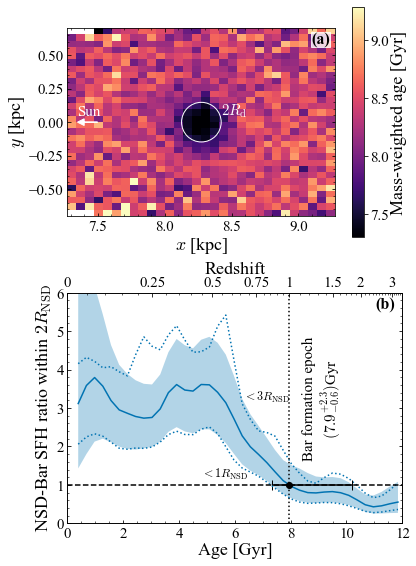

In [35]:
# binned stat 2d imshow

f,a = plt.subplots(2,1,figsize=(6,9.5))
plt.subplots_adjust(hspace=0.24)
plt.sca(a[0])
from scipy.stats import binned_statistic_2d
_, test_spline = spline_marginalization(mc_s22.aux_parameters['aux_knots'], 
                                         np.array(mc_s22.samples()['ln_w_P']),
                                         jnp.log10(data['period'].values))
# noSF on top as removes SF effect
nsd_weight = age_period(data['period'])**0.48*np.exp(n_d_samples_noSF['denom_nsdweights'])/\
            (np.exp(n_d_samples['denom_nsdweights'])+np.exp(n_d_samples[f'denom_pFweights'])*np.exp(test_spline[1]))
n,b=np.histogram(age_period(data['period']), weights=nsd_weight,bins=40); # gives p_NSD(P)
n2,b=np.histogram(age_period(np.power(10.,outside_samples_map[:,6]))[outside_samples_map[:,-1]!=1],bins=b) # should be approx. uniform
rw = np.interp(age_period(np.power(10.,outside_samples_map[:,6])),.5*(b[1:]+b[:-1]),n/n2)

bb = binned_statistic_2d(outside_samples_map[:,2]*np.cos(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]),
           outside_samples_map[:,2]*np.sin(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]),
           rw*age_period(np.power(10.,outside_samples_map[:,6])),bins=30,range=[[8.275-1.,8.275+1.],[-0.7,0.7]]);
bb2 = binned_statistic_2d(outside_samples_map[:,2]*np.cos(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]),
           outside_samples_map[:,2]*np.sin(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]),
           rw,bins=30,range=[[8.275-1.,8.275+1.],[-0.7,0.7]]);

plt.imshow(bb.statistic.T/bb2.statistic.T, origin='lower', 
          vmin=np.nanpercentile(bb.statistic.T/bb2.statistic.T,1.)-0.1,
          vmax=np.nanpercentile(bb.statistic.T/bb2.statistic.T,99.)+0.1, 
          aspect='auto', cmap='magma',
          extent=[bb.x_edge[0], bb.x_edge[-1],bb.y_edge[0], bb.y_edge[-1]])
plt.colorbar(label='Mass-weighted age [Gyr]')
plt.gca().set_aspect('equal')
add_inner_ticks()
# draw circle
circle = plt.Circle((8.275, 0), 0.074*2, color='white', fill=False, lw=1)
plt.gca().add_artist(circle)
plt.annotate(r'$2R_\mathrm{d}$',(8.275+2*0.074,0.05),color='white',fontsize=15)
plt.xlabel('$x$ [kpc]')
plt.ylabel('$y$ [kpc]')


plt.arrow(7.5, 0, -0.1, 0, head_width=0.05, head_length=0.05, fc='w', ec='w')
plt.annotate('Sun', (7.35, 0.05), fontsize=15,color='w')


plt.sca(a[1])
smw = 1.
for times_scale in [1.,2.,3.]:
        inside_ = np.hypot(8.275-outside_samples_map[:,2]*np.cos(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]),
                        outside_samples_map[:,2]*np.sin(outside_samples_map[:,0])*np.cos(outside_samples_map[:,1]))<0.074*times_scale
        n,b=np.histogram(age_period(np.power(10.,outside_samples_map[inside_ & (outside_samples_map[:,-1]<0.5),6])),bins=b,
                weights=rw[inside_ & (outside_samples_map[:,-1]<0.5)])
        n2,b=np.histogram(age_period(np.power(10.,outside_samples_map[inside_ & (outside_samples_map[:,-1]>0.5),6])),bins=b,
                weights=rw[inside_ & (outside_samples_map[:,-1]>0.5)])
        from scipy.ndimage import gaussian_filter1d
        LS = '-'
        if times_scale!=2.:
            LS = 'dotted'
        plt.plot(.5*(b[1:]+b[:-1]),gaussian_filter1d(n/n2,smw,mode='nearest'),c=sns.color_palette('colorblind')[0],label='NSD/Bar',
                 ls=LS)

        if times_scale!=2.:
            continue
        _, test_spline_bins = spline_marginalization(mc_s22.aux_parameters['aux_knots'], 
                                                np.array(mc_s22.samples()['ln_w_P']),
                                                np.log10(period_age(.5*(b[1:]+b[:-1]))),Ns=200)
        plt.fill_between(.5*(b[1:]+b[:-1]),gaussian_filter1d(n/n2*np.exp(test_spline_bins[0]-test_spline_bins[1]),smw,mode='nearest'),
                                        gaussian_filter1d(n/n2*np.exp(test_spline_bins[2]-test_spline_bins[1]),smw,mode='nearest'), alpha=0.3)

        fltr = (.5*(b[1:]+b[:-1])>6.)&(.5*(b[1:]+b[:-1])<11.)
        plt.axvline(np.interp(np.array([1.]),(gaussian_filter1d((n/n2),smw,mode='nearest'))[fltr][::-1],
        .5*(b[1:]+b[:-1])[fltr][::-1]),c='k',ls=':')
        Y,YL,YU=(np.interp(np.array([1.]),(gaussian_filter1d((n/n2),smw,mode='nearest'))[fltr][::-1],
        .5*(b[1:]+b[:-1])[fltr][::-1])[0],
        np.interp(np.array([1.]),(gaussian_filter1d((n/n2)*np.exp(test_spline_bins[0]-test_spline_bins[1]),smw,mode='nearest'))[fltr][::-1],
        .5*(b[1:]+b[:-1])[fltr][::-1])[0],
        np.interp(np.array([1.]),(gaussian_filter1d((n/n2)*np.exp(test_spline_bins[2]-test_spline_bins[1]),smw,mode='nearest'))[fltr][::-1],
        .5*(b[1:]+b[:-1])[fltr][::-1])[0]
        )

        plt.errorbar(Y,1.,xerr=np.array([[Y-YL],[YU-Y]]),c='k',fmt='o',capsize=5)
        plt.annotate('Bar formation epoch\n      $(%0.1f^{+%0.1f}_{-%0.1f})$Gyr'%(Y,YU-Y,Y-YL), rotation=90, xy=[8.4,1.8],fontsize=15)

plt.ylabel(r'NSD-Bar SFH ratio within $2 R_\mathrm{NSD}$')
plt.xlabel(r'Age [Gyr]')
plt.ylim(0.,6.)        
plt.axhline(1.,color='k',ls='--')
add_inner_ticks()

plt.annotate(r'$<1R_\mathrm{NSD}$', (4.8,1.2), fontsize=12)
plt.annotate(r'$<3R_\mathrm{NSD}$', (6.3,3.2), fontsize=12)

plt.xlim(0.,12.)
plt.gca().twiny()
plt.xlim(0.,12.)
plt.gca().tick_params(axis="x",direction="in")
plt.gca().tick_params(axis="x",direction="in",which='minor')
plt.xlabel('Redshift')
from astropy import cosmology
plt.gca().set_xticks(cosmology.Planck18.lookback_time([0,0.25,0.5,0.75,1,1.5,2,3]).value, [0,0.25,0.5,0.75,1,1.5,2,3]);
plt.gca().set_xticks(cosmology.Planck18.lookback_time([0,0.05,0.1,0.15,0.2,0.3,0.35,0.4,0.45,0.55,0.6,0.65,0.7,0.8,0.85,0.9,0.95,
                                                      1.1,1.2,1.3,1.4,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.1,3.2,3.3,3.4,3.5]).value, None,minor=True);

plt.sca(a[0])
t=plt.annotate('(a)',xy=(0.98,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='right',va='top', color='k')
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0.06))
plt.sca(a[1])
plt.annotate('(b)',xy=(0.98,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='right',va='top')

plt.savefig('plots/from_outside.pdf', bbox_inches='tight')

# No Pml

In [36]:
n_d_samples_nopml = generate_numerator_and_denominator_samples(data, bar_model, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=SF,
                                                         include_radial_velocities=False,
                                                         include_pml=False)

In [37]:
n_d_samples_nopml_noSF = generate_numerator_and_denominator_samples(data, bar_model_nodist, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=None,
                                                         include_radial_velocities=False,
                                                         include_pml=False)

In [38]:
data_scaled = load_mira_sample(lowb=True, sig_clip=3., reliable=True, 
                        high_amp=True, per_cut=[100.,1000.], 
                        scale_proper_motion_errors=True)
n_d_samples_scaled = generate_numerator_and_denominator_samples(data_scaled, bar_model, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=SF,
                                                         include_radial_velocities=False)

1782
1691 91
1415 342
1392 18
1172 282
1163 42


In [39]:
n_d_samples_scaled_noSF = generate_numerator_and_denominator_samples(data_scaled, bar_model_nodist, 
                                                         N_num_samples=500, 
                                                         N_denom_samples=1000, 
                                                         SF=None,
                                                         include_radial_velocities=False)

In [40]:
mc_s22_nopml = run_mcmc_spline(n_d_samples_nopml, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True)

sample: 100%|█| 2400/2400 [00:21<00:00, 110.87it/s, 15 steps of size 3.12e-01. acc. prob=0.87


In [41]:
mc_s22_nopml = run_mcmc_spline(n_d_samples_nopml, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True)
mc_s22_scaled = run_mcmc_spline(n_d_samples_scaled, True, True, knot_spacing='linear', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True)
mc_s22_age = run_mcmc_spline(n_d_samples, True, True, knot_spacing='age', 
                         Nknots=default_N_knots, n_samples=1600, background_model='p17',
                         smoothing_hyperparameter=True)

sample: 100%|█| 2400/2400 [00:22<00:00, 106.09it/s, 15 steps of size 2.70e-01. acc. prob=0.90
sample: 100%|█| 2400/2400 [00:23<00:00, 101.21it/s, 15 steps of size 2.58e-01. acc. prob=0.91
sample: 100%|█| 2400/2400 [00:19<00:00, 120.11it/s, 7 steps of size 3.42e-01. acc. prob=0.87]


7.891891891891892
7.903903903903903
7.873873873873873
7.87987987987988
7.897897897897898
7.915915915915916


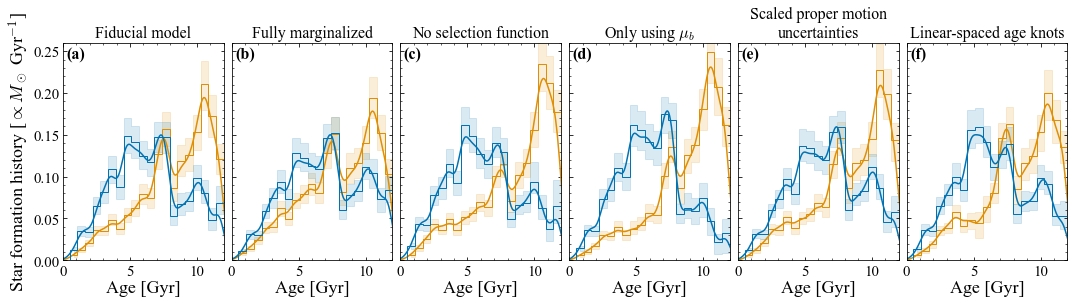

In [42]:
## 5 panels -- default, fully marginalized, no selection function, no pml, scaled pms
f,a=plt.subplots(1,6,figsize=(18,4),sharey=True)
plt.subplots_adjust(wspace=0.05)
plt.sca(a[0])
make_age_distribution_plot(mc_s22, n_d_samples, a[0], reweight=n_d_samples_noSF, sfh=True, add_labels=False)
plt.title('Fiducial model',fontsize=16)
plt.annotate('(a)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.sca(a[1])
make_age_distribution_plot(mc_full, n_d_samples, a[1], reweight=n_d_samples_noSF, sfh=True, add_labels=False)
plt.title('Fully marginalized',fontsize=16)
plt.annotate('(b)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.sca(a[2])
make_age_distribution_plot(mc_s22_noSF, n_d_samples_noSF, a[2], reweight=None, sfh=True, add_labels=False)
plt.title('No selection function',fontsize=16)
plt.annotate('(c)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.sca(a[3])
make_age_distribution_plot(mc_s22_nopml, n_d_samples_nopml, a[3], reweight=n_d_samples_nopml_noSF, sfh=True, add_labels=False)
plt.title('Only using $\mu_b$',fontsize=16)
plt.annotate('(d)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.sca(a[4])
make_age_distribution_plot(mc_s22_scaled, n_d_samples_scaled, a[4], reweight=n_d_samples_scaled_noSF, sfh=True, add_labels=False)
plt.title('Scaled proper motion\nuncertainties',fontsize=16)
plt.annotate('(e)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.sca(a[5])
make_age_distribution_plot(mc_s22_age, n_d_samples_scaled, a[5], reweight=n_d_samples_scaled_noSF, sfh=True, add_labels=False)
plt.title('Linear-spaced age knots',fontsize=16)
plt.annotate('(f)',xy=(0.02,0.98),xycoords='axes fraction',fontsize=16,fontweight='bold',ha='left',va='top')
plt.savefig('plots/sfh_comparison.pdf',bbox_inches='tight')

7.903903903903903
7.891891891891892


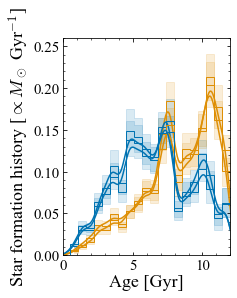

In [43]:
plt.figure(figsize=[3,4])
make_age_distribution_plot(mc_s22_alt, n_d_samples_modified, a[0], reweight=n_d_samples_noSF, sfh=True, add_labels=False)
make_age_distribution_plot(mc_s22, n_d_samples, a[0], reweight=n_d_samples_noSF, sfh=True, add_labels=False)

In [46]:
# Make table of best-fit ages for different models
# -------------------------------------------------
lbls = ['Fiducial','Alternate period--age relation','Marginalized','No selection function','Only $\mu_b$','Scaled proper motion errors','Age-separated knots']
models = [mc_s22, mc_s22, mc_full, mc_s22_noSF, mc_s22_nopml, mc_s22_scaled, mc_s22_age]
samples = [n_d_samples, n_d_samples, n_d_samples, n_d_samples_noSF, n_d_samples_nopml, n_d_samples_scaled, n_d_samples]
reweight_samples = [n_d_samples_noSF, n_d_samples_noSF, n_d_samples_noSF, None, n_d_samples_nopml_noSF, n_d_samples_scaled_noSF, n_d_samples_noSF]
age_rel = [True, False, True, True, True, True, True]
for l,m,s,r,ar in zip(lbls,models,samples,reweight_samples,age_rel):

    _,test_spline = spline_marginalization(m.aux_parameters['aux_knots'], 
                                         np.array(m.samples()['ln_w_P']),
                                         jnp.log10(data['period'].values))
    if r is not None:
        rfw = np.exp(r[f'denom_nsdweights']-s[f'denom_nsdweights'])
    else:
        rfw = 1.
    extra_weight = lambda x: x**0.48
    nsd_weight = [rfw*extra_weight(age_period(data['period'],with_gc=ar))*np.exp(s['denom_nsdweights'])/\
                  (np.exp(s['denom_nsdweights'])+np.exp(s[f'denom_pFweights'])*np.exp(test_spline[i])) for i in range(3)]
    GK=gaussian_kde(age_period(data['period'],with_gc=ar), weights=nsd_weight[1], bw_method=0.5*len(data) ** (-1 / 5.))
    xxy = np.linspace(5.,11.5,1000)
    print(l+'&$%0.2f$\\\\'%(.5*(xxy[1:]+xxy[:-1])[np.argmax(np.abs(np.diff(GK(xxy))))]))

Fiducial&$7.90$\\
Alternate period--age relation&$7.29$\\
Marginalized&$7.91$\\
No selection function&$7.87$\\
Only $\mu_b$&$7.88$\\
Scaled proper motion errors&$7.90$\\
Age-separated knots&$7.91$\\


In [47]:
samples_map_justmub=generate_samples(mc_s22_nopml, bar_model, data=data, add_errors=True, Nsamples=150000, SF=SF)

Using S22 weights
Including background
Spline model for relative weight


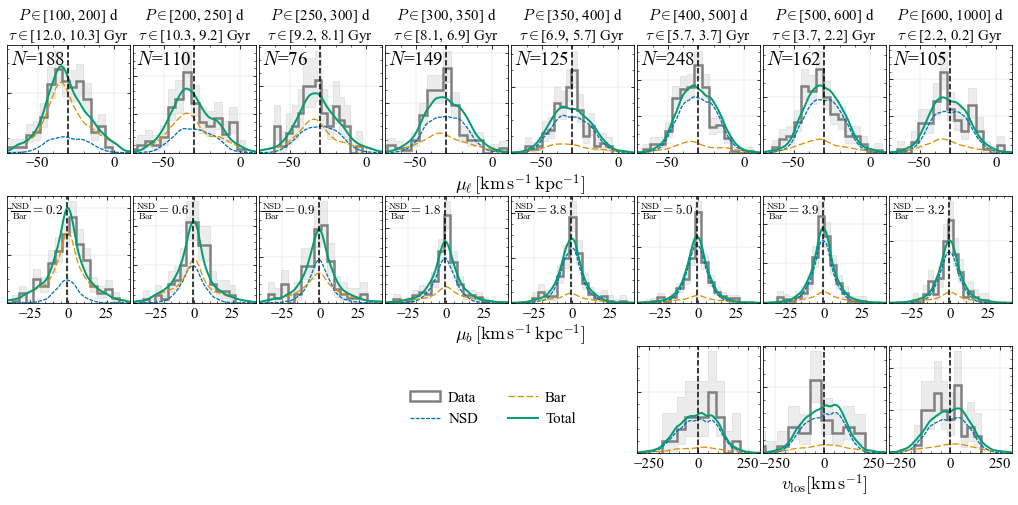

In [48]:
make_velocity_plot_grid(samples_map_justmub)